<a href="https://colab.research.google.com/github/jeevanvishwa02/Data_Science/blob/main/Group_Project_Fall2022_Twitter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Group Project: Twitter Classification (Fall 2022)
**Dr. Dave Wanik - OPIM 5509: Introduction to Deep Learning - University of Connecticut**

* Group Number: 9
* Group Members: Jeevan Vishwanadhuni, Sravan Kumar Reddy Vanga, Vir Vishal Masabatula

-----------------------------------------------
Can deep learning 'steal' the logic of rules-based sentiment analysis packages? In this project, you will see if a deep learning model can replicate the scores of a well-known sentiment analysis scoring model called 'Sentiment Intensity Analyzer' from the nltk package.

For this project, you are provided with a function to scrape tweets of certain users on Twitter. Use the function to scrape 1000 tweets (or more! 2000 is better) for any person(s) or organization(s) you are interested in. You then feed these Tweets into the `nltk SentimentIntensityAnalyzer()` and generate [four sentiment scores: positive, negative, neutral and composite](https://stackoverflow.com/questions/40325980/how-is-the-vader-compound-polarity-score-calculated-in-python-nltk). You will use these scores as your target variables (a neural network with 4 outputs) and try to predict them by just using the words in the Tweets!

Of course, as I mention above, you are only required to use one Twitter account for the project, but if you want to go above and beyond and scrape MANY tweets from many different people, you are welcome to do so - the more the merrier!

The rubric is shown below. Good luck!



## Rubric

Your script should be able to run completely in this notebook - no need to mount your Google Drive since this is all public data! Points off if it all doesn't run in this notebook. Notebook should be fully executed before submitting or points off.


**Part I: Data Preparation ( 25 points)**
* (5 points) Write a few lines about the two people/organizations you are going to scrape. Why are they of interest to you? Why should they be of interest to me?
* (5 points) Use the function to scrape 1000 tweets from each a single person/organization. Then merge your 1k individual text files into a single .csv file [like this](https://medium.com/@stella96joshua/how-to-combine-multiple-csv-files-using-python-for-your-analysis-a88017c6ff9e). Your .csv file should have 1000 rows and 3 or 4 columns at this point.
* (5 points) Create a word cloud from the text data - what do you see? You may need to tokenize the data before performing this step.
* (10 points) Run the `nltk Sentiment Intensity Analyzer`. You will run the `nltk SentimentIntensityAnalyzer()` to derive 4 scores for each Tweet: compound, pos, neutral and neg. Follow [this example](https://www.nltk.org/howto/sentiment.html) and review [this example](https://www.nltk.org/_modules/nltk/sentiment/vader.html) to understand how `nltk` is calculating these scores. Add these scores as 4 columns to your .csv file - which should have 1k rows and 7 or 8 columns.
* (5 points) Examine the distribution of the scores for each score (make a 5 number summary and create a histogram for each score) - you are going to try to predict these scores using your recurrent neural network (with four outputs!) 


**Part II: Modeling (45 points)**
* (30 points) Fit three models with different architectures of varying complexity. Please have nice organized headers so I can grade it easily. 

* Model 1: CountVectorizer() and TF-IDF with Dense Neural Networks
* Model 2: Flattened word embeddings into a Dense Neural Network (pre-trained)
* Model 3: DL model with at least one recurrent layer and other things we learned from class.

  * LSTM, GRU or SimpleRNN
  * Bidirectional LSTM or GRU
  * 1D Conv and Pooling
  * Stacked layers etc.
  * You are welcome to try pre-trained word embeddings but are not required to.

* (15 points) For each model you build, make sure you provide learning curves (early stopping is a good idea) and a scatterplot of actual vs. predicted values for train and test partition along with useful error metrics (R2, MAE, RMSE etc.) Make some comments on which model is doing the best. Make sure you are 'tinkering' with your model to get the best results possible and ensure that you are not overfitting.

**Tip:** You may get bad results - this is OK! If you do, try to experiment with the hyperparameters such as the max length and common words you will keep - this can make a big difference! Do not worry too much about accuracy from the first model, just try to improve it in subsequent models. You may need to grab more Tweets or choose a different Twitter account if your model has no skill.




**Part III: Analysis (20 points)**
* Write five to ten bullets to compare your results and discuss how you improve the models by changing the architectures. Was your Deep Learning model able to 'steal' the logic of the `nltk SentimentIntensityAnalyzer()`? Make some comments about how deep learning is superior to rules-based systems like the `nltk SentimentIntensityAnalyzer()`.


... and have fun!

## Code starts here!!!!

Following code takes around 18 minutes to run

In [1]:
# import the builtin time module
import time

# Grab Currrent Time Before Running the Code
start = time.time()

In [2]:
# import modules
import numpy as np
import pandas as pd

# plotting
import seaborn as sns
import matplotlib.pyplot as plt

# need to add nltk imports up here
# link: https://www.nltk.org/
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

## Part 1- Data Preparation

### Why Democrats vs Republicans? 
---
We'll choose out tweets from the Republican and Democratic parties. Being the two main political opponents in the United States, these two parties use Twitter in a mature manner to engage in verbal combat and criticism. 
1. We want to comprehend the economics underlying the governments that run the nation since we are the future leaders of the corporate world. 
2. As we read and comprehend their intentions and work to advance American prosperity, we want to know how two major political parties captured their emotions in each tweet. Assuming most of them should be neutral to avoid any public nuiances, we want to test this through our analysis
3. As a legal citizen of US, we will get to know better how these two parties handled their tweets. As opposition will try to critcize and party in power will try to support any issue/policy, we feel this will give us rich information in emotions capturing two opposite emotions  

### Tweet Scraping

Creation of folders for Democrats and Republics

In [3]:
# make a folder to store data for Democrats
base_dir = '/content/'

import tensorflow as tf

#Create a new directory (a folder) in your Drive
tf.io.gfile.mkdir(base_dir)

#Combine the 2 strings
Democrats_dir = base_dir + '/Democrats/'

#Create the second directory
tf.io.gfile.mkdir(Democrats_dir)

In [4]:
# make a folder to store data for Republicans
base_dir = '/content/'

import tensorflow as tf

#Create a new directory (a folder) in your Drive
tf.io.gfile.mkdir(base_dir)

#Combine the 2 strings
Republicans_dir = base_dir + '/Republicans/'

#Create the second directory
tf.io.gfile.mkdir(Republicans_dir)

Scrape the tweets

In [5]:
#Import packages required for scraping the tweets
!pip install snscrape
import snscrape.modules.twitter as sntwitter
import csv

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 59 kB 531 kB/s 


In [6]:
#Democrats
maxTweets = 1000  #Limit the number of tweets to 1000

for i,tweet in enumerate(sntwitter.TwitterSearchScraper('from:@TheDemocrats + since:2013-01-01 until:2022-11-27-filter:links -filter:replies').get_items()):
  csvFile = open(Democrats_dir + str(i) + '.csv', 'a', newline='', encoding='utf8')
  csvWriter = csv.writer(csvFile)
  csvWriter.writerow(['id','date','tweet',])

  if i > maxTweets :
    break
  csvWriter.writerow([tweet.id, tweet.date, tweet.content])
csvFile.close()

In [7]:
#Republicans
maxTweets = 1000

for i,tweet in enumerate(sntwitter.TwitterSearchScraper('from:@GOP + since:2013-01-01 until:2022-11-27-filter:links -filter:replies').get_items()):
  csvFile = open(Republicans_dir + str(i) + '.csv', 'a', newline='', encoding='utf8')
  csvWriter = csv.writer(csvFile)
  csvWriter.writerow(['id','date','tweet',])

  if i > maxTweets :
    break
  csvWriter.writerow([tweet.id, tweet.date, tweet.content])
csvFile.close()

### Merging into one CSV

#### Democrats

In [8]:
import pandas as pd

In [9]:
# Sample check of one row

df = pd.read_csv("/content/Democrats/0.csv")
df

,id,date,tweet
0,1596515626818076673,2022-11-26 14:46:01+00:00,Small businesses employ millions of Americans ...


In [10]:
#import the modules and creation of paths
import os
import pandas as pd
#read the path
file_path_acc1 = "/content/Democrats"
#list all the files from the directory
file_list_acc1 = os.listdir(file_path_acc1)
file_path_acc2 = "/content/Republicans"
file_list_acc2 = os.listdir(file_path_acc2)

In [11]:
#Test for one sample row
a = pd.read_csv('/content/Democrats/730.csv')
b=pd.read_csv('/content/Republicans/730.csv')

#print(a)
a.append(b)

,id,date,tweet
0,1563307809831530497,2022-08-26 23:30:01+00:00,—10 million new jobs\n—3.5% unemployment rate—...
0,1569806891169058816,2022-09-13 21:55:03+00:00,Today is #UncleSamDay &amp; we want YOU to joi...


In [12]:
#Append Democrat Data
df = pd.DataFrame()
#append all files together
for file in file_list_acc1:
  read_file_path=file_path_acc1+'/'+file
  df_temp = pd.read_csv(read_file_path)
  df = df.append(df_temp, ignore_index=True)
  
df['is_acct1']=1
df.head()

,id,date,tweet,is_acct1
0,1591432131368333312,2022-11-12 14:06:02+00:00,Grassroots donors and volunteers made history ...,1
1,1596515626818076673,2022-11-26 14:46:01+00:00,Small businesses employ millions of Americans ...,1
2,1568232760426532865,2022-09-09 13:40:01+00:00,Election Day is 60 days away. Have you made a ...,1
3,1579879573264556034,2022-10-11 17:00:17+00:00,Every single Republican in Congress voted agai...,1
4,1589396519295373317,2022-11-06 23:17:14+00:00,HAPPENING NOW: President @JoeBiden takes the s...,1


#### Republicans

In [13]:
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html
for file in file_list_acc2:
  read_file_path=file_path_acc2+'/'+file
  df_temp = pd.read_csv(read_file_path)
  df = df.append(df_temp, ignore_index=True) 
df['is_acct1'].fillna(0,inplace=True)
df.tail()

,id,date,tweet,is_acct1
1997,1581379385713561600,2022-10-15 20:20:00+00:00,Because of Biden and the Democrats’ reckless a...,0.0
1998,1565305218056732672,2022-09-01 11:47:00+00:00,Pennsylvania Democrat John Fetterman wants to ...,0.0
1999,1590133223484690433,2022-11-09 00:04:38+00:00,Congrats to Senator @votetimscott on a re-elec...,0.0
2000,1562562024550596608,2022-08-24 22:06:32+00:00,🚨NEW EPISODE OF #REALAMERICA DROPS TOMORROW🚨\n...,0.0
2001,1573905385940975619,2022-09-25 05:21:00+00:00,Retweet 🔁 if you want our economy to get back ...,0.0


is_acct1=1 for Democrats and is_acct2 for Republicans

In [14]:
df.to_csv('final_data.csv')  #create a csv file 

In [15]:
df_raw=df.copy()  # create a copy

### Word Cloud

In [16]:
from keras.utils import pad_sequences

Lower Case

In [17]:
df['tweet'].head()

0    Grassroots donors and volunteers made history ...
1    Small businesses employ millions of Americans ...
2    Election Day is 60 days away. Have you made a ...
3    Every single Republican in Congress voted agai...
4    HAPPENING NOW: President @JoeBiden takes the s...
Name: tweet, dtype: object

Dissect the tweet column 
1. Convert all tweets to Lowercase
2. Remove extra characters and symbols which does not provide any information
3. Removal of stopwords(Words which do not provide any information)

In [18]:
df['tweet_transform']=df['tweet'].str.lower()
df['tweet_transform'].head()

0    grassroots donors and volunteers made history ...
1    small businesses employ millions of americans ...
2    election day is 60 days away. have you made a ...
3    every single republican in congress voted agai...
4    happening now: president @joebiden takes the s...
Name: tweet_transform, dtype: object

In [19]:
df.head()

,id,date,tweet,is_acct1,tweet_transform
0,1591432131368333312,2022-11-12 14:06:02+00:00,Grassroots donors and volunteers made history ...,1.0,grassroots donors and volunteers made history ...
1,1596515626818076673,2022-11-26 14:46:01+00:00,Small businesses employ millions of Americans ...,1.0,small businesses employ millions of americans ...
2,1568232760426532865,2022-09-09 13:40:01+00:00,Election Day is 60 days away. Have you made a ...,1.0,election day is 60 days away. have you made a ...
3,1579879573264556034,2022-10-11 17:00:17+00:00,Every single Republican in Congress voted agai...,1.0,every single republican in congress voted agai...
4,1589396519295373317,2022-11-06 23:17:14+00:00,HAPPENING NOW: President @JoeBiden takes the s...,1.0,happening now: president @joebiden takes the s...


Remove extra characters like (,./+ etc)

In [20]:
df['tweet_transform']=df['tweet_transform'].str.replace('[^A-z ]','').str.replace(' +',' ').str.strip()
df.head()

<ipython-input-20-3d7fb0800e0a>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['tweet_transform']=df['tweet_transform'].str.replace('[^A-z ]','').str.replace(' +',' ').str.strip()


,id,date,tweet,is_acct1,tweet_transform
0,1591432131368333312,2022-11-12 14:06:02+00:00,Grassroots donors and volunteers made history ...,1.0,grassroots donors and volunteers made history ...
1,1596515626818076673,2022-11-26 14:46:01+00:00,Small businesses employ millions of Americans ...,1.0,small businesses employ millions of americans ...
2,1568232760426532865,2022-09-09 13:40:01+00:00,Election Day is 60 days away. Have you made a ...,1.0,election day is days away have you made a plan...
3,1579879573264556034,2022-10-11 17:00:17+00:00,Every single Republican in Congress voted agai...,1.0,every single republican in congress voted agai...
4,1589396519295373317,2022-11-06 23:17:14+00:00,HAPPENING NOW: President @JoeBiden takes the s...,1.0,happening now president joebiden takes the sta...


Remove stopwords like (the, you etc)

In [21]:
import nltk  #NLTK is natural learning tool kit
from nltk.corpus import stopwords  #Stop words are general words which are used in the sentences but doent add any meaning to them

nltk.download('stopwords')
print(stopwords.words('english'))

stop=stopwords.words('english')

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [22]:
df.head(10)

,id,date,tweet,is_acct1,tweet_transform
0,1591432131368333312,2022-11-12 14:06:02+00:00,Grassroots donors and volunteers made history ...,1.0,grassroots donors and volunteers made history ...
1,1596515626818076673,2022-11-26 14:46:01+00:00,Small businesses employ millions of Americans ...,1.0,small businesses employ millions of americans ...
2,1568232760426532865,2022-09-09 13:40:01+00:00,Election Day is 60 days away. Have you made a ...,1.0,election day is days away have you made a plan...
3,1579879573264556034,2022-10-11 17:00:17+00:00,Every single Republican in Congress voted agai...,1.0,every single republican in congress voted agai...
4,1589396519295373317,2022-11-06 23:17:14+00:00,HAPPENING NOW: President @JoeBiden takes the s...,1.0,happening now president joebiden takes the sta...
5,1573437051806142467,2022-09-23 22:20:00+00:00,Republicans’ “Commitment to America”:\n\n—Ban ...,1.0,republicans commitment to americaban abortion ...
6,1589952179259031552,2022-11-08 12:05:14+00:00,Polls are starting to open in states across th...,1.0,polls are starting to open in states across th...
7,1574934420255084544,2022-09-28 01:30:01+00:00,Republicans want to cut Social Security and Me...,1.0,republicans want to cut social security and me...
8,1564968776596078594,2022-08-31 13:30:06+00:00,President Biden's historic accomplishments thi...,1.0,president bidens historic accomplishments this...
9,1565079733829861377,2022-08-31 20:51:00+00:00,Some of President Biden's August accomplishmen...,1.0,some of president bidens august accomplishment...


In [23]:
df['tweet_transform']=df['tweet_transform'].apply(lambda x:' '.join([word for word in x.split() if word not in (stop)]))
df.head()

,id,date,tweet,is_acct1,tweet_transform
0,1591432131368333312,2022-11-12 14:06:02+00:00,Grassroots donors and volunteers made history ...,1.0,grassroots donors volunteers made history tues...
1,1596515626818076673,2022-11-26 14:46:01+00:00,Small businesses employ millions of Americans ...,1.0,small businesses employ millions americans str...
2,1568232760426532865,2022-09-09 13:40:01+00:00,Election Day is 60 days away. Have you made a ...,1.0,election day days away made plan votehttpstcoz...
3,1579879573264556034,2022-10-11 17:00:17+00:00,Every single Republican in Congress voted agai...,1.0,every single republican congress voted taking ...
4,1589396519295373317,2022-11-06 23:17:14+00:00,HAPPENING NOW: President @JoeBiden takes the s...,1.0,happening president joebiden takes stage new y...


Most common words

In [24]:
# 1) what are the most common words in the tweet column? 
# you can also turn this into a bar plot!
myTable = df['tweet_transform'].str.split(expand=True).stack().value_counts()
myTable[0:20] # too cool! 

democrats      371
vote           320
biden          285
president      266
republicans    209
republican     205
inflation      179
act            169
make           160
costs          159
election       153
americans      143
joe            140
american       140
voted          136
reduction      133
new            128
day            124
november       124
joebiden       111
dtype: int64

In [25]:
# Frequency plot 
# we'll group, then convert to pandas DataFrame for easy plotting
x = df['tweet_transform'].str.split(expand=True).stack().value_counts()
x = pd.DataFrame(x)
# reset the index
x.reset_index(inplace=True)
# rename the columns
x.rename(columns={x.columns[0]:'word', x.columns[1]:'frequency'}, inplace=True)
x.head()

,word,frequency
0,democrats,371
1,vote,320
2,biden,285
3,president,266
4,republicans,209


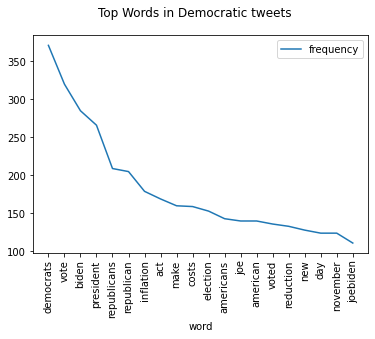

In [26]:
# Frequency Distribution Plot
# look at first X words

# len(x) just the number of rows

x = x[0:20] # wanna play? change the 20 to 10 or 30 and see what happens...
            # you need to run the previous cell first
x.plot(x='word', y='frequency')
plt.xticks(np.arange(len(x)), x['word'], rotation=90)
plt.suptitle('Top Words in Democratic tweets')
plt.show()


Democrats is the most common word used in the dataset of 2000 rows followed by vote, biden, president etc

Word Cloud

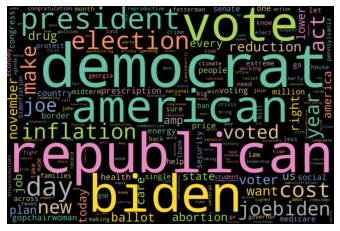

In [27]:
# https://amueller.github.io/word_cloud/auto_examples/simple.html#sphx-glr-auto-examples-simple-py

from wordcloud import WordCloud

# Generate a word cloud image
wordcloud = WordCloud().generate(' '.join(df['tweet_transform']))

# lower max_font_size
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, 
background_color='black', colormap='Set2', collocations=False).generate(' '.join(df['tweet_transform']))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### Tokenizer

Tokens

Tokenize will create a list of words from tweet_transform column

In [28]:
df['tweet_token']=df.apply(lambda row: nltk.word_tokenize(row['tweet_transform']),axis=1)

In [29]:
df.head()

,id,date,tweet,is_acct1,tweet_transform,tweet_token
0,1591432131368333312,2022-11-12 14:06:02+00:00,Grassroots donors and volunteers made history ...,1.0,grassroots donors volunteers made history tues...,"[grassroots, donors, volunteers, made, history..."
1,1596515626818076673,2022-11-26 14:46:01+00:00,Small businesses employ millions of Americans ...,1.0,small businesses employ millions americans str...,"[small, businesses, employ, millions, american..."
2,1568232760426532865,2022-09-09 13:40:01+00:00,Election Day is 60 days away. Have you made a ...,1.0,election day days away made plan votehttpstcoz...,"[election, day, days, away, made, plan, voteht..."
3,1579879573264556034,2022-10-11 17:00:17+00:00,Every single Republican in Congress voted agai...,1.0,every single republican congress voted taking ...,"[every, single, republican, congress, voted, t..."
4,1589396519295373317,2022-11-06 23:17:14+00:00,HAPPENING NOW: President @JoeBiden takes the s...,1.0,happening president joebiden takes stage new y...,"[happening, president, joebiden, takes, stage,..."


Stemming

In [30]:
# this cuts down on dimensionality (eg: running and run will be converted to run  ) 

from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

# this is the function we will use
ps = PorterStemmer()


In [31]:
df['stemmed']=df['tweet_token'].apply(lambda x:[ps.stem(y) for y in x])  #Stem every word

In [32]:
df[['tweet_token','stemmed']].head()

,tweet_token,stemmed
0,"[grassroots, donors, volunteers, made, history...","[grassroot, donor, volunt, made, histori, tues..."
1,"[small, businesses, employ, millions, american...","[small, busi, employ, million, american, stren..."
2,"[election, day, days, away, made, plan, voteht...","[elect, day, day, away, made, plan, votehttpst..."
3,"[every, single, republican, congress, voted, t...","[everi, singl, republican, congress, vote, tak..."
4,"[happening, president, joebiden, takes, stage,...","[happen, presid, joebiden, take, stage, new, y..."


As you can see, 
1. Plurals are converted to singular
2. Words are shortened to the point where it gives the meaning(happening->happen) 

###Sentiment Score Calculation

In [33]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [34]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [35]:
df.head()

,id,date,tweet,is_acct1,tweet_transform,tweet_token,stemmed
0,1591432131368333312,2022-11-12 14:06:02+00:00,Grassroots donors and volunteers made history ...,1.0,grassroots donors volunteers made history tues...,"[grassroots, donors, volunteers, made, history...","[grassroot, donor, volunt, made, histori, tues..."
1,1596515626818076673,2022-11-26 14:46:01+00:00,Small businesses employ millions of Americans ...,1.0,small businesses employ millions americans str...,"[small, businesses, employ, millions, american...","[small, busi, employ, million, american, stren..."
2,1568232760426532865,2022-09-09 13:40:01+00:00,Election Day is 60 days away. Have you made a ...,1.0,election day days away made plan votehttpstcoz...,"[election, day, days, away, made, plan, voteht...","[elect, day, day, away, made, plan, votehttpst..."
3,1579879573264556034,2022-10-11 17:00:17+00:00,Every single Republican in Congress voted agai...,1.0,every single republican congress voted taking ...,"[every, single, republican, congress, voted, t...","[everi, singl, republican, congress, vote, tak..."
4,1589396519295373317,2022-11-06 23:17:14+00:00,HAPPENING NOW: President @JoeBiden takes the s...,1.0,happening president joebiden takes stage new y...,"[happening, president, joebiden, takes, stage,...","[happen, presid, joebiden, take, stage, new, y..."


In [36]:
# Take one sample tweet and get the polarity scores to check how it works
df['tweet'][5]

'Republicans’ “Commitment to America”:\n\n—Ban abortion nationally\n—Cut Social Security and Medicare\n—Raise prescription drug costs'

In [37]:
#Test for one sentence
sid = SentimentIntensityAnalyzer()
sentence='Republicans’ “Commitment to America”: —Ban abortion nationally —Cut Social Security and Medicare —Raise prescription drug costs'
ss = sid.polarity_scores(sentence)
ss

{'neg': 0.0, 'neu': 0.862, 'pos': 0.138, 'compound': 0.34}

In [38]:
ss['compound']

0.34

In [39]:
# create four lists and append the polarity scores  
compound=[]
neg=[]
neu=[]
pos=[]

for sentence in df['tweet']:
  sid = SentimentIntensityAnalyzer()
  #print(sentence)
  ss = sid.polarity_scores(sentence)
  compound.append(ss['compound'])
  neg.append(ss['neg'])
  neu.append(ss['neu'])
  pos.append(ss['pos'])

# Attach the data into dataframes

df['neg']=neg
df['neu']=neu
df['pos']=pos
df['compound']=compound

In [40]:
#Check the data
df.head()

,id,date,tweet,is_acct1,tweet_transform,tweet_token,stemmed,neg,neu,pos,compound
0,1591432131368333312,2022-11-12 14:06:02+00:00,Grassroots donors and volunteers made history ...,1.0,grassroots donors volunteers made history tues...,"[grassroots, donors, volunteers, made, history...","[grassroot, donor, volunt, made, histori, tues...",0.000,1.000,0.000,0.0000
1,1596515626818076673,2022-11-26 14:46:01+00:00,Small businesses employ millions of Americans ...,1.0,small businesses employ millions americans str...,"[small, businesses, employ, millions, american...","[small, busi, employ, million, american, stren...",0.000,0.752,0.248,0.8360
2,1568232760426532865,2022-09-09 13:40:01+00:00,Election Day is 60 days away. Have you made a ...,1.0,election day days away made plan votehttpstcoz...,"[election, day, days, away, made, plan, voteht...","[elect, day, day, away, made, plan, votehttpst...",0.000,1.000,0.000,0.0000
3,1579879573264556034,2022-10-11 17:00:17+00:00,Every single Republican in Congress voted agai...,1.0,every single republican congress voted taking ...,"[every, single, republican, congress, voted, t...","[everi, singl, republican, congress, vote, tak...",0.269,0.641,0.090,-0.6369
4,1589396519295373317,2022-11-06 23:17:14+00:00,HAPPENING NOW: President @JoeBiden takes the s...,1.0,happening president joebiden takes stage new y...,"[happening, president, joebiden, takes, stage,...","[happen, presid, joebiden, take, stage, new, y...",0.000,0.884,0.116,0.3612


In [41]:
df[['id','date','tweet','neg','neu','pos','compound']].to_csv('df_scores.csv')

####Distribution of scores

In [42]:
a=df['neg'].describe()

In [43]:
# create a function to get firve number summary and histogram plot
import seaborn as sns
def summary(df,score):
  print("Summary of",score)
  s=df[score].describe()
  print("Mean {:0.3f}".format(s[1]))
  print("Maximum {:0.3f}".format(s[-1]))
  print("75th pctile {:0.3f}".format(s[-2]))
  print("Median {:0.3f}".format(s[-3]))
  print("25th pctile {:0.3f}".format(s[-4]))
  print("Minimum {:0.3f}".format(s[-5]))
  print("\nHistogram for score",score.upper())
  sns.histplot(data=df,x=score,kde=True)

Summary of neg
Mean 0.070
Maximum 0.661
75th pctile 0.128
Median 0.000
25th pctile 0.000
Minimum 0.000

Histogram for score NEG


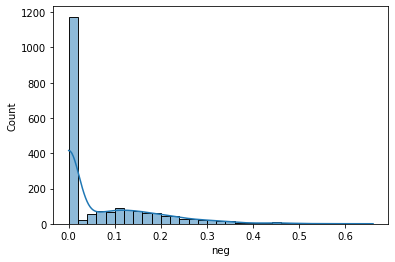

In [44]:
summary(df,'neg')

In [45]:
print("Number of tweets with negative score is",len(df[df['neg']!=0]))
print("Average of score for negative tweets is {:0.3f}".format(df[df['neg']!=0]['neg'].mean()))

Number of tweets with negative score is 828
Average of score for negative tweets is 0.169


Summary of pos
Mean 0.121
Maximum 0.841
75th pctile 0.194
Median 0.087
25th pctile 0.000
Minimum 0.000

Histogram for score POS


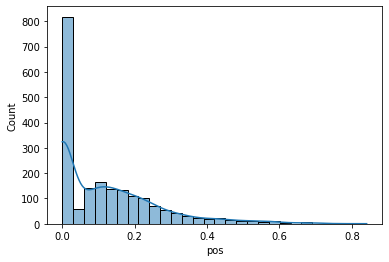

In [46]:
summary(df,'pos')

In [47]:
print("Number of tweets with positive score is",len(df[df['pos']!=0]))
print("Average of score for positive tweets is {:0.3f}".format(df[df['pos']!=0]['pos'].mean()))

Number of tweets with positive score is 1187
Average of score for positive tweets is 0.204


Summary of compound
Mean 0.109
Maximum 0.955
75th pctile 0.477
Median 0.000
25th pctile -0.178
Minimum -0.957

Histogram for score COMPOUND


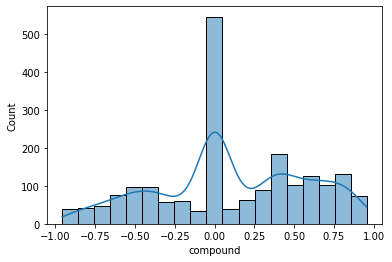

In [48]:
summary(df,'compound')

In [49]:
print("Number of tweets with compound score is",len(df[df['compound']!=0]))
print("Average of score for compound tweets is {:0.3f}".format(df[df['compound']!=0]['compound'].mean()))

Number of tweets with compound score is 1474
Average of score for compound tweets is 0.148


Summary of neu
Mean 0.809
Maximum 1.000
75th pctile 1.000
Median 0.819
25th pctile 0.703
Minimum 0.159

Histogram for score NEU


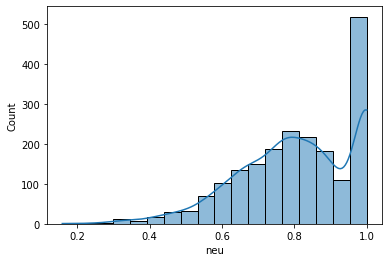

In [50]:
summary(df,'neu')

In [51]:
print("Number of tweets with neutral score is",len(df[df['neu']!=0]))
print("Average of score for neutral tweets is {:0.3f}".format(df[df['neu']!=0]['neu'].mean()))

Number of tweets with neutral score is 2002
Average of score for neutral tweets is 0.809


Based on above distributions, we can see that most of the tweets are neutral which might be more like statements from both political parties

## Part II - Modeling

####Data Cleaning

1.   Remove of URLS
2.   Remove of numbers in between the words



In [52]:
#remove urls from the text
# https://stackoverflow.com/questions/51994254/removing-url-from-a-column-in-pandas-dataframe

test_url=[]
test_url.append('https://huskyct.uconn.edu/ultra/institution-page')
test_df=pd.DataFrame(test_url)  # convert to dataframe

test_df.columns=['url']
test_df['url2']=test_df['url'].str.replace('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', ' ')
test_df

<ipython-input-52-5f321410bf43>:9: FutureWarning: The default value of regex will change from True to False in a future version.
  test_df['url2']=test_df['url'].str.replace('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', ' ')


,url,url2
0,https://huskyct.uconn.edu/ultra/institution-page,


In [53]:
#Apply the same logic for all the rows
df['tweet'] = df['tweet'].str.replace('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', ' ')

<ipython-input-53-8f2352f6f1c4>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['tweet'] = df['tweet'].str.replace('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', ' ')


In [54]:
# remove numbers from the data as they donot represent any sentiment 
# https://stackoverflow.com/questions/19084443/replacing-digits-with-str-replace

import re

# Test for one string
s='Prices for sweets rose 13.1% in September'
re.sub('\d|[%@.$+-]', '', s)

'Prices for sweets rose  in September'

In [55]:
tweet=[]
for i in df['tweet']:
  tweet.append(re.sub('\d|[%@.$+-]', '', str(i)))
df['tweet']=tweet

In [56]:
df['tweet'].head()

0    Grassroots donors and volunteers made history ...
1    Small businesses employ millions of Americans ...
2    Election Day is  days away Have you made a pla...
3    Every single Republican in Congress voted agai...
4    HAPPENING NOW: President JoeBiden takes the st...
Name: tweet, dtype: object

### Model 1 

Counter Vectorizer and TL-IDF with DNN

#### Count Vectorizer

##### Function
Define a function CV for end to end execution for all four scores


0.   Import Packages
1.   Prepare X and y columns
2.   Transformation(Lower case, Remove stop words and Tokenization)
      
      All the steps which are done in Part-I will be taken care using one line of code in this step(lower case, stopwords and toknize). Unigrams are considered here to simplify the analysis
3.   Train and Test split
4.   Modeling
      
      ->optimizer=rmsprop(default learning rate is 0.001), patience=10, batch_size=5

5.   Scatter Plots



https://keras.io/api/optimizers/rmsprop/#:~:text=schedules.,Defaults%20to%200.001.

In [57]:
def cv(df,x_col,y_col):
  # Part 0 Import necessary packages
  from sklearn.feature_extraction.text import CountVectorizer
  from nltk.tokenize import RegexpTokenizer

  from sklearn.model_selection import train_test_split

  from sklearn.ensemble import RandomForestRegressor
  from sklearn.metrics import r2_score
  from sklearn.metrics import mean_absolute_error

  import matplotlib.pyplot as plt
  import pandas as pd

  # Part 1 - Prepare X and y columns for modeling

  X=pd.DataFrame(df[x_col])
  y=df[y_col]
  print("Shape of X and y",X.shape,y.shape)

  # Part 2 - Tokenization

  ## get rid of garbage text
  token = RegexpTokenizer(r'[a-zA-Z0-9]+')

  ## tokenizer to remove unwanted elements from out data like symbols and numbers
  ## IN ONE LINE OF CODE! 
  cv = CountVectorizer(lowercase=True,
                      stop_words='english',
                      ngram_range = (1,1), # (1,1) is unigram, (1,2) is uni and bigram, (2,2) is just bigram
                      tokenizer = token.tokenize)

  ## Transform the X columns using the cv
  # text_counts is a SPARSE MATRIX!
  text_counts= cv.fit_transform(X[x_col]) # x_col is the parameter which is triggered in the function
  print("Data type of Text Counts is ",type(text_counts))
  #print("Shape of Text Counts is",text_counts.shape)


  # https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html#sklearn.feature_extraction.text.CountVectorizer

  # Feature names in CV
  feature_names=pd.DataFrame(cv.get_feature_names_out())
  # print("\nCheck for any token features which are either numbers or links in the data")  --> Links and number are removed in Data cleaning step
  # print(feature_names.head())
  # print(feature_names.tail())

  ## Change the type of text counts to numpy array as this will be used as input for FNN
  text_counts=text_counts.toarray()
  print("\nData type of Text Counts is ",type(text_counts))

  # Part 3 - Train Test Split

  # 70% training 30% test
  # notice we we 
  X_train, X_test, y_train, y_test = train_test_split(text_counts, y, test_size=0.3)

  print("\nShape of variables after Train Test split")
  print("Shape of Text counts",text_counts.shape)
  print("Shape of X_train and Y_train",X_train.shape,y_train.shape)
  print("Shape of X_test and Y_test",X_test.shape,y_test.shape)

  # Part 4 - Modeling

  print("\nBuild, Compile and Execution of Model\n")
  ## import the packages
  from keras.models import Sequential
  from keras.layers import Dense, Dropout
  from keras.callbacks import EarlyStopping

  model = Sequential()
  model.add(Dense(100, activation='relu', input_shape=(X_train.shape[1],)))
  #print(X_train.shape[1]*100+100)
  model.add(Dropout(0.5))
  model.add(Dense(50, activation='relu'))
  #print(100*50+50)
  model.add(Dropout(0.5))
  model.add(Dense(25, activation='relu'))
  #print(50*25+25)
  model.add(Dense(1, activation='linear'))
  #print(25*1+1)
  model.summary()


  model.compile(optimizer='rmsprop',
                loss='mse',
                metrics=['mae'])


  # early stopping callback
  es = EarlyStopping(monitor='val_loss',
                    mode='min',
                    patience=10, # you can choose a big value!
                    restore_best_weights = True) # don't forget this! otherwise it's potentially suboptimal weights


  # fit the model!
  # assign it to a new variable called 'history' in case
  # we want to look at the learning curves

  history = model.fit(X_train, y_train,
                      validation_data = (X_test, y_test),
                      callbacks=[es], # early stopping callbacks
                      epochs=200, # set this to a big number
                      batch_size=5, # this is a hyperparameter
                      shuffle=True, # it's a best practice to shuffle your data
                      verbose=1) # this prints the output as the model trains


  # Part 5 - Evaluation
  print("\nLoss curves for Test and Train Data based on model\n")

  # let's see the training and validation accuracy by epoch
  history_dict = history.history
  loss_values = history_dict['loss'] # you can change this
  val_loss_values = history_dict['val_loss'] # you can also change this
  epochs = range(1, len(loss_values) + 1) # range of X (no. of epochs)
  plt.plot(epochs, loss_values, 'bo', label='Training loss')
  plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
  plt.title('Training and validation loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()


  # let's see the training and validation accuracy by epoch
  history_dict = history.history
  loss_values = history_dict['mae'] # you can change this
  val_loss_values = history_dict['val_mae'] # you can also change this
  epochs = range(1, len(loss_values) + 1) # range of X (no. of epochs)
  plt.plot(epochs, loss_values, 'bo', label='Training mae')
  plt.plot(epochs, val_loss_values, 'orange', label='Validation mae')
  plt.title('Training and validation mae')
  plt.xlabel('Epochs')
  plt.ylabel('mae')
  plt.legend()
  plt.show()

  # Part 6 - Scatter Plots

  print("\nScatter Plot to compare actual vs predicted\n")

  # scatterplot of actual vs. pred
  # specify the dimensions 
  fig, axes = plt.subplots(1,2) # 1 row, 2 columns

  # this makes the individual subplots
  # Training Results
  axes[0].scatter(x=y_train, y=model.predict(X_train)) #first row, first entry (left top)
  axes[0].set_xlabel("Actual", fontsize=10)
  axes[0].set_ylabel("Predicted",  fontsize=10)
  axes[0].set_title("Training")
  # add 45 deg line
  x = np.linspace(*axes[0].get_xlim())
  axes[0].plot(x, x, color='red')
  # Validation Results
  axes[1].scatter(x=y_test, y=model.predict(X_test)) # first row, second entry (right top)
  axes[1].set_xlabel("Actual", fontsize=10)
  axes[1].set_ylabel("Predicted",  fontsize=10)
  axes[1].set_title("Validation")
  # add 45 deg line
  x = np.linspace(*axes[1].get_xlim())
  axes[1].plot(x, x, color='red')

  # tight layout
  fig.tight_layout()

  # show the plot
  plt.show()


  # metrics

  print("\nEvaluation Metrics\n")

  pred = model.predict(X_test)
  pred

  trainpreds = model.predict(X_train)

  from sklearn.metrics import mean_absolute_error
  from sklearn.metrics import r2_score
  from sklearn.metrics import mean_squared_error

  # input the data into a dataframe
  test = pd.DataFrame()
  test['score_name']=[y_col,y_col]
  test['dataset']=['Training','Validation']
  test['mae']=[mean_absolute_error(y_train, trainpreds),mean_absolute_error(y_test, pred)]
  test['R_sq']=[r2_score(y_train, trainpreds),r2_score(y_test, pred)]
  test['mse']=[mean_squared_error(y_train, trainpreds),mean_squared_error(y_test, pred)]
  #model1.append(test, ignore_index=True)
  #model1_resu=pd.concat([model1,test])
  print("\nMean Absolute Error")


  print("Train Data is {:0.3f}".format(mean_absolute_error(y_train, trainpreds))) # train
  print("Validation Data  is {:0.3f}".format(mean_absolute_error(y_test, pred))) # test

  print("\nR-squared")
  print("Train Data is {:0.3f}".format(r2_score(y_train, trainpreds))) # train
  print("Validation Data  is {:0.3f}".format(r2_score(y_test, pred))) # test

  print("\nMean sqaured value")
  print("Train Data : {:0.3f}".format(mean_squared_error(y_train, trainpreds))) # train
  print("Validation Data  : {:0.3f}".format(mean_squared_error(y_test, pred))) # test

  return test

##### Compound

Shape of X and y (2002, 1) (2002,)
Data type of Text Counts is  <class 'scipy.sparse.csr.csr_matrix'>

Data type of Text Counts is  <class 'numpy.ndarray'>

Shape of variables after Train Test split
Shape of Text counts (2002, 3470)
Shape of X_train and Y_train (1401, 3470) (1401,)
Shape of X_test and Y_test (601, 3470) (601,)

Build, Compile and Execution of Model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               347100    
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                 

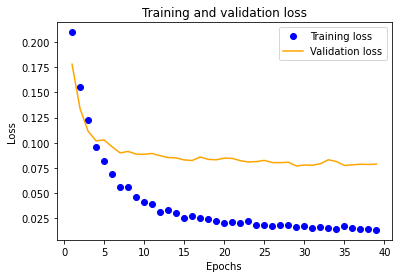

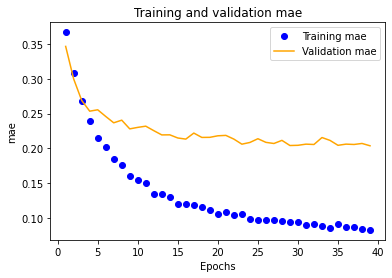


Scatter Plot to compare actual vs predicted

19/19 [==============================] - 0s 3ms/step


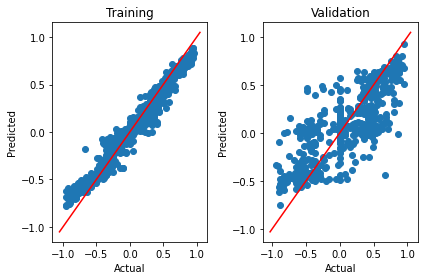


Evaluation Metrics

44/44 [==============================] - 0s 3ms/step

Mean Absolute Error
Train Data is 0.066
Validation Data  is 0.204

R-squared
Train Data is 0.962
Validation Data  is 0.650

Mean sqaured value
Train Data : 0.008
Validation Data  : 0.077


In [58]:
df_compound=cv(df,'tweet','compound')

##### Negative

Shape of X and y (2002, 1) (2002,)
Data type of Text Counts is  <class 'scipy.sparse.csr.csr_matrix'>

Data type of Text Counts is  <class 'numpy.ndarray'>

Shape of variables after Train Test split
Shape of Text counts (2002, 3470)
Shape of X_train and Y_train (1401, 3470) (1401,)
Shape of X_test and Y_test (601, 3470) (601,)

Build, Compile and Execution of Model

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 100)               347100    
                                                                 
 dropout_2 (Dropout)         (None, 100)               0         
                                                                 
 dense_5 (Dense)             (None, 50)                5050      
                                                                 
 dropout_3 (Dropout)         (None, 50)                0         
               

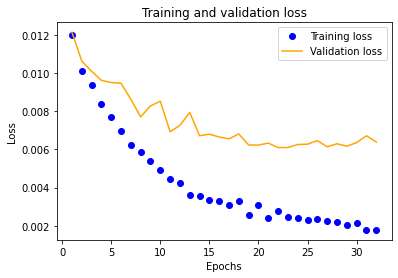

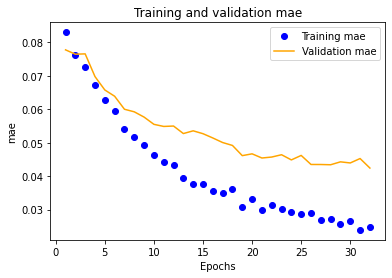


Scatter Plot to compare actual vs predicted

19/19 [==============================] - 0s 3ms/step


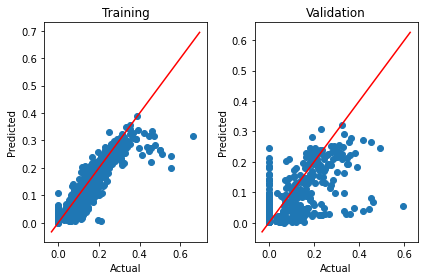


Evaluation Metrics

44/44 [==============================] - 0s 3ms/step

Mean Absolute Error
Train Data is 0.019
Validation Data  is 0.046

R-squared
Train Data is 0.877
Validation Data  is 0.490

Mean sqaured value
Train Data : 0.001
Validation Data  : 0.006


In [59]:
df_neg=cv(df,'tweet','neg')

##### Positive

Shape of X and y (2002, 1) (2002,)
Data type of Text Counts is  <class 'scipy.sparse.csr.csr_matrix'>

Data type of Text Counts is  <class 'numpy.ndarray'>

Shape of variables after Train Test split
Shape of Text counts (2002, 3470)
Shape of X_train and Y_train (1401, 3470) (1401,)
Shape of X_test and Y_test (601, 3470) (601,)

Build, Compile and Execution of Model

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 100)               347100    
                                                                 
 dropout_4 (Dropout)         (None, 100)               0         
                                                                 
 dense_9 (Dense)             (None, 50)                5050      
                                                                 
 dropout_5 (Dropout)         (None, 50)                0         
               

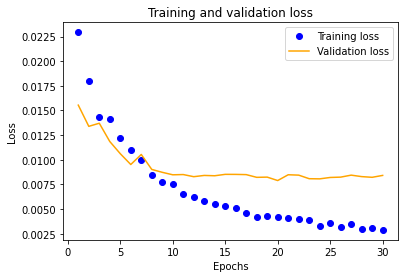

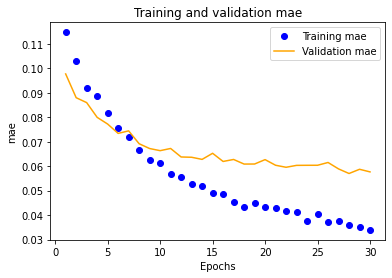


Scatter Plot to compare actual vs predicted

19/19 [==============================] - 0s 3ms/step


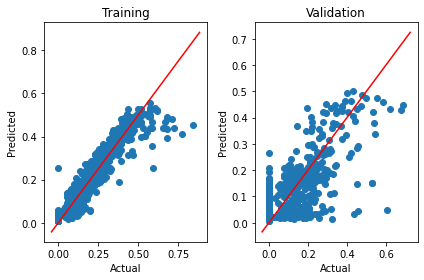


Evaluation Metrics

44/44 [==============================] - 0s 3ms/step

Mean Absolute Error
Train Data is 0.029
Validation Data  is 0.063

R-squared
Train Data is 0.913
Validation Data  is 0.561

Mean sqaured value
Train Data : 0.002
Validation Data  : 0.008


In [60]:
df_pos=cv(df,'tweet','pos')

##### Neutral

Shape of X and y (2002, 1) (2002,)
Data type of Text Counts is  <class 'scipy.sparse.csr.csr_matrix'>

Data type of Text Counts is  <class 'numpy.ndarray'>

Shape of variables after Train Test split
Shape of Text counts (2002, 3470)
Shape of X_train and Y_train (1401, 3470) (1401,)
Shape of X_test and Y_test (601, 3470) (601,)

Build, Compile and Execution of Model

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 100)               347100    
                                                                 
 dropout_6 (Dropout)         (None, 100)               0         
                                                                 
 dense_13 (Dense)            (None, 50)                5050      
                                                                 
 dropout_7 (Dropout)         (None, 50)                0         
               

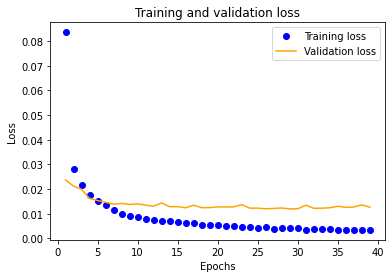

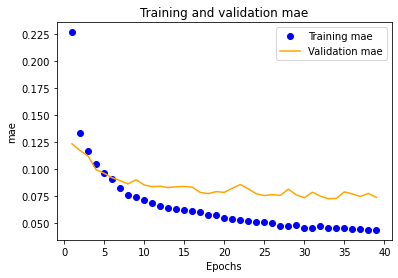


Scatter Plot to compare actual vs predicted

19/19 [==============================] - 0s 3ms/step


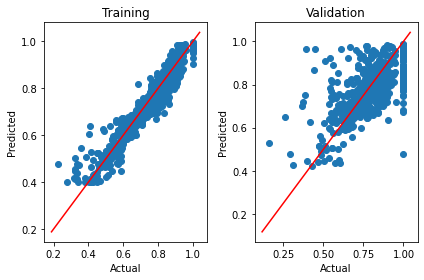


Evaluation Metrics

44/44 [==============================] - 0s 3ms/step

Mean Absolute Error
Train Data is 0.029
Validation Data  is 0.076

R-squared
Train Data is 0.944
Validation Data  is 0.535

Mean sqaured value
Train Data : 0.001
Validation Data  : 0.012


In [61]:
df_neu=cv(df,'tweet','neu')

##### Appending metrics into a frame

In [62]:
model_cv=pd.concat([df_compound,df_neg,df_pos,df_neu])
model_cv['model_name']='Count-Vector'
model_cv

,score_name,dataset,mae,R_sq,mse,model_name
0,compound,Training,0.066315,0.962116,0.008270,Count-Vector
1,compound,Validation,0.204039,0.650453,0.076978,Count-Vector
0,neg,Training,0.018810,0.877017,0.001287,Count-Vector
1,neg,Validation,0.045709,0.490472,0.006093,Count-Vector
0,pos,Training,0.028686,0.913171,0.001844,Count-Vector
1,pos,Validation,0.062678,0.560761,0.007892,Count-Vector
0,neu,Training,0.028574,0.943614,0.001427,Count-Vector
1,neu,Validation,0.076135,0.534939,0.011968,Count-Vector


#### TF-IDF

##### Function
Define a function tf_idf for end to end execution for all four scores


0.   Import Packages
1.   Prepare X and y columns
2.   Transformation(Lower case, Remove stop words and Tokenization)
3.   Train and Test split
4.   Modeling
5.   Scatter Plots



In [63]:
def tf_idf(df,x_col,y_col):

  # Part 0 Import necessary packages
  from sklearn.feature_extraction.text import TfidfVectorizer

  from sklearn.model_selection import train_test_split

  from sklearn.metrics import r2_score
  from sklearn.metrics import mean_absolute_error

  import matplotlib.pyplot as plt
  
  # Part 1 - Prepare X and y columns for modeling

  X=pd.DataFrame(df[x_col])
  y=df[y_col]
  print(X.shape,y.shape)

  # Part 2 Create the matrix
  
  tf=TfidfVectorizer()
  text_tf= tf.fit_transform(X[x_col]) # don't forget to update!!!

  ## check out what you did
  print("Number of TF-IDFs", text_tf.shape) 
  print("Number of words", text_tf[0])

  ## Change the type of text counts to numpy array as this will be used as input for FNN
  text_tf=text_tf.toarray()
  print("\nData type of TD IDF is ",type(text_tf))

  # Part 3 - Train Test Split

  # 70% training 30% test
  # notice we we 
  X_train, X_test, y_train, y_test = train_test_split(text_tf, y, test_size=0.3)

  print("\nShape of variables after Train Test split")
  print("Shape of Text counts",text_tf.shape)
  print("Shape of X_train and Y_train",X_train.shape,y_train.shape)
  print("Shape of X_test and Y_test",X_test.shape,y_test.shape)

  # Part 4 - Modeling

  print("\nBuild, Compile and Execution of Model\n")
  ## import the packages
  from keras.models import Sequential
  from keras.layers import Dense, Dropout
  from keras.callbacks import EarlyStopping

  model = Sequential()
  model.add(Dense(100, activation='relu', input_shape=(X_train.shape[1],)))
  model.add(Dropout(0.5))
  model.add(Dense(50, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(25, activation='relu'))
  model.add(Dense(1, activation='linear'))
  model.summary()


  model.compile(optimizer='rmsprop',
                loss='mse',
                metrics=['mae'])


  # early stopping callback
  es = EarlyStopping(monitor='val_loss',
                    mode='min',
                    patience=10, # you can choose a big value!
                    restore_best_weights = True) # don't forget this! otherwise it's potentially suboptimal weights


  # fit the model!
  # assign it to a new variable called 'history' in case
  # we want to look at the learning curves

  history = model.fit(X_train, y_train,
                      validation_data = (X_test, y_test),
                      callbacks=[es], # early stopping callbacks
                      epochs=200, # set this to a big number
                      batch_size=10, # this is a hyperparameter
                      shuffle=True, # it's a best practice to shuffle your data
                      verbose=1) # this prints the output as the model trains


  # Part 5 - Evaluation
  print("\nLoss curves for Test and Train Data based on model\n")

  # let's see the training and validation accuracy by epoch
  history_dict = history.history
  loss_values = history_dict['loss'] # you can change this
  val_loss_values = history_dict['val_loss'] # you can also change this
  epochs = range(1, len(loss_values) + 1) # range of X (no. of epochs)
  plt.plot(epochs, loss_values, 'bo', label='Training loss')
  plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
  plt.title('Training and validation loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()


  # let's see the training and validation accuracy by epoch
  history_dict = history.history
  loss_values = history_dict['mae'] # you can change this
  val_loss_values = history_dict['val_mae'] # you can also change this
  epochs = range(1, len(loss_values) + 1) # range of X (no. of epochs)
  plt.plot(epochs, loss_values, 'bo', label='Training mae')
  plt.plot(epochs, val_loss_values, 'orange', label='Validation mae')
  plt.title('Training and validation mae')
  plt.xlabel('Epochs')
  plt.ylabel('mae')
  plt.legend()
  plt.show()

  # Part 6 - Scatter Plots

  print("\nScatter Plot to compare actual vs predicted\n")

  # scatterplot of actual vs. pred
  # specify the dimensions 
  fig, axes = plt.subplots(1,2) # 1 row, 2 columns

  # this makes the individual subplots
  # Training Results
  axes[0].scatter(x=y_train, y=model.predict(X_train)) #first row, first entry (left top)
  axes[0].set_xlabel("Actual", fontsize=10)
  axes[0].set_ylabel("Predicted",  fontsize=10)
  axes[0].set_title("Training")
  # add 45 deg line
  x = np.linspace(*axes[0].get_xlim())
  axes[0].plot(x, x, color='red')
  # Validation Results
  axes[1].scatter(x=y_test, y=model.predict(X_test)) # first row, second entry (right top)
  axes[1].set_xlabel("Actual", fontsize=10)
  axes[1].set_ylabel("Predicted",  fontsize=10)
  axes[1].set_title("Validation")
  # add 45 deg line
  x = np.linspace(*axes[1].get_xlim())
  axes[1].plot(x, x, color='red')

  # tight layout
  fig.tight_layout()

  # show the plot
  plt.show()


  # metrics

  print("\nEvaluation Metrics\n")

  pred = model.predict(X_test)
  pred

  trainpreds = model.predict(X_train)

  from sklearn.metrics import mean_absolute_error
  from sklearn.metrics import r2_score
  from sklearn.metrics import mean_squared_error

    # input the data into a dataframe
  test = pd.DataFrame()
  test['score_name']=[y_col,y_col]
  test['dataset']=['Training','Validation']
  test['mae']=[mean_absolute_error(y_train, trainpreds),mean_absolute_error(y_test, pred)]
  test['R_sq']=[r2_score(y_train, trainpreds),r2_score(y_test, pred)]
  test['mse']=[mean_squared_error(y_train, trainpreds),mean_squared_error(y_test, pred)]

  print("\nMean Absolute Error")
  print("Train Data is {:0.3f}".format(mean_absolute_error(y_train, trainpreds))) # train
  print("Test Data  is {:0.3f}".format(mean_absolute_error(y_test, pred))) # test

  print("\nR-squared")
  print("Train Data is {:0.3f}".format(r2_score(y_train, trainpreds))) # train
  print("Test Data  is {:0.3f}".format(r2_score(y_test, pred))) # test

  print("\nMean sqaured value")
  print("Train Data : {:0.3f}".format(mean_squared_error(y_train, trainpreds))) # train
  print("Test Data  : {:0.3f}".format(mean_squared_error(y_test, pred))) # test

  return test

##### Compound

(2002, 1) (2002,)
Number of TF-IDFs (2002, 3676)
Number of words   (0, 707)	0.1213300890620348
  (0, 35)	0.13390269335676622
  (0, 3098)	0.21512863175724145
  (0, 2580)	0.21512863175724145
  (0, 3528)	0.15313572959285784
  (0, 2564)	0.21512863175724145
  (0, 2311)	0.1878119120723407
  (0, 3121)	0.14364189646438907
  (0, 1677)	0.12695847156603887
  (0, 2088)	0.13983089166597876
  (0, 563)	0.1878119120723407
  (0, 2612)	0.20847621279380188
  (0, 1112)	0.1656930651117501
  (0, 3269)	0.1203835878457167
  (0, 983)	0.2030407907315615
  (0, 1430)	0.1823764900101003
  (0, 1505)	0.23579293247870264
  (0, 1679)	0.19844520685889125
  (0, 3320)	0.10298172090015091
  (0, 6)	0.23579293247870264
  (0, 3553)	0.15505977032519958
  (0, 931)	0.1823764900101003
  (0, 3275)	0.13883093148701672
  (0, 3278)	0.13645230469450764
  (0, 2256)	0.0726520440765736
  (0, 282)	0.14648331062941827
  (0, 3392)	0.1878119120723407
  (0, 2275)	0.15537859899347392
  (0, 1545)	0.1513283711393074
  (0, 1955)	0.13983089166597

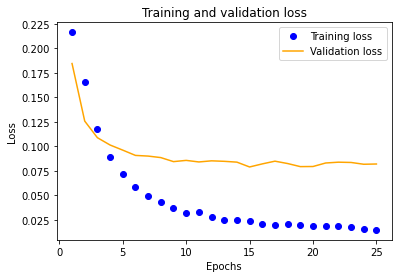

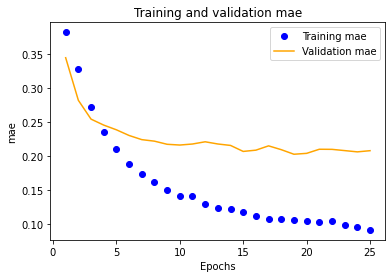


Scatter Plot to compare actual vs predicted

19/19 [==============================] - 0s 2ms/step


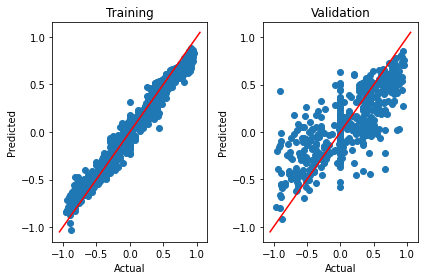


Evaluation Metrics

44/44 [==============================] - 0s 3ms/step

Mean Absolute Error
Train Data is 0.069
Test Data  is 0.207

R-squared
Train Data is 0.964
Test Data  is 0.627

Mean sqaured value
Train Data : 0.008
Test Data  : 0.079


In [64]:
df_compound=tf_idf(df,'tweet','compound')

##### Negative

(2002, 1) (2002,)
Number of TF-IDFs (2002, 3676)
Number of words   (0, 707)	0.1213300890620348
  (0, 35)	0.13390269335676622
  (0, 3098)	0.21512863175724145
  (0, 2580)	0.21512863175724145
  (0, 3528)	0.15313572959285784
  (0, 2564)	0.21512863175724145
  (0, 2311)	0.1878119120723407
  (0, 3121)	0.14364189646438907
  (0, 1677)	0.12695847156603887
  (0, 2088)	0.13983089166597876
  (0, 563)	0.1878119120723407
  (0, 2612)	0.20847621279380188
  (0, 1112)	0.1656930651117501
  (0, 3269)	0.1203835878457167
  (0, 983)	0.2030407907315615
  (0, 1430)	0.1823764900101003
  (0, 1505)	0.23579293247870264
  (0, 1679)	0.19844520685889125
  (0, 3320)	0.10298172090015091
  (0, 6)	0.23579293247870264
  (0, 3553)	0.15505977032519958
  (0, 931)	0.1823764900101003
  (0, 3275)	0.13883093148701672
  (0, 3278)	0.13645230469450764
  (0, 2256)	0.0726520440765736
  (0, 282)	0.14648331062941827
  (0, 3392)	0.1878119120723407
  (0, 2275)	0.15537859899347392
  (0, 1545)	0.1513283711393074
  (0, 1955)	0.13983089166597

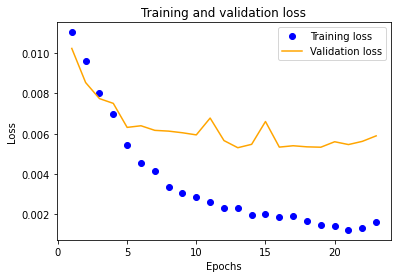

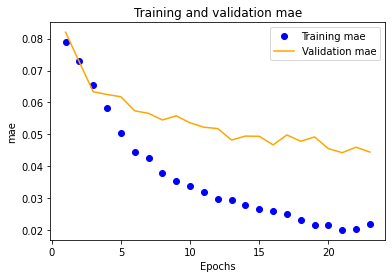


Scatter Plot to compare actual vs predicted

19/19 [==============================] - 0s 3ms/step


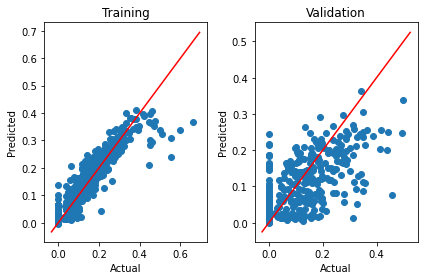


Evaluation Metrics

44/44 [==============================] - 0s 3ms/step

Mean Absolute Error
Train Data is 0.020
Test Data  is 0.048

R-squared
Train Data is 0.903
Test Data  is 0.529

Mean sqaured value
Train Data : 0.001
Test Data  : 0.005


In [65]:
df_neg=tf_idf(df,'tweet','neg')

##### Positive

(2002, 1) (2002,)
Number of TF-IDFs (2002, 3676)
Number of words   (0, 707)	0.1213300890620348
  (0, 35)	0.13390269335676622
  (0, 3098)	0.21512863175724145
  (0, 2580)	0.21512863175724145
  (0, 3528)	0.15313572959285784
  (0, 2564)	0.21512863175724145
  (0, 2311)	0.1878119120723407
  (0, 3121)	0.14364189646438907
  (0, 1677)	0.12695847156603887
  (0, 2088)	0.13983089166597876
  (0, 563)	0.1878119120723407
  (0, 2612)	0.20847621279380188
  (0, 1112)	0.1656930651117501
  (0, 3269)	0.1203835878457167
  (0, 983)	0.2030407907315615
  (0, 1430)	0.1823764900101003
  (0, 1505)	0.23579293247870264
  (0, 1679)	0.19844520685889125
  (0, 3320)	0.10298172090015091
  (0, 6)	0.23579293247870264
  (0, 3553)	0.15505977032519958
  (0, 931)	0.1823764900101003
  (0, 3275)	0.13883093148701672
  (0, 3278)	0.13645230469450764
  (0, 2256)	0.0726520440765736
  (0, 282)	0.14648331062941827
  (0, 3392)	0.1878119120723407
  (0, 2275)	0.15537859899347392
  (0, 1545)	0.1513283711393074
  (0, 1955)	0.13983089166597

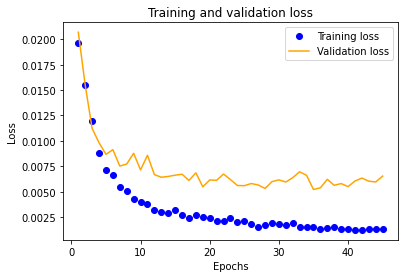

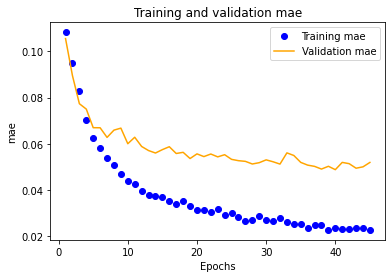


Scatter Plot to compare actual vs predicted

19/19 [==============================] - 0s 2ms/step


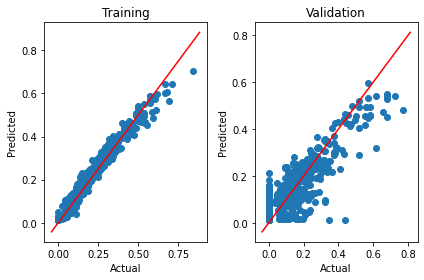


Evaluation Metrics

44/44 [==============================] - 0s 2ms/step

Mean Absolute Error
Train Data is 0.020
Test Data  is 0.052

R-squared
Train Data is 0.969
Test Data  is 0.769

Mean sqaured value
Train Data : 0.001
Test Data  : 0.005


In [66]:
df_pos=tf_idf(df,'tweet','pos')

##### Neutral

(2002, 1) (2002,)
Number of TF-IDFs (2002, 3676)
Number of words   (0, 707)	0.1213300890620348
  (0, 35)	0.13390269335676622
  (0, 3098)	0.21512863175724145
  (0, 2580)	0.21512863175724145
  (0, 3528)	0.15313572959285784
  (0, 2564)	0.21512863175724145
  (0, 2311)	0.1878119120723407
  (0, 3121)	0.14364189646438907
  (0, 1677)	0.12695847156603887
  (0, 2088)	0.13983089166597876
  (0, 563)	0.1878119120723407
  (0, 2612)	0.20847621279380188
  (0, 1112)	0.1656930651117501
  (0, 3269)	0.1203835878457167
  (0, 983)	0.2030407907315615
  (0, 1430)	0.1823764900101003
  (0, 1505)	0.23579293247870264
  (0, 1679)	0.19844520685889125
  (0, 3320)	0.10298172090015091
  (0, 6)	0.23579293247870264
  (0, 3553)	0.15505977032519958
  (0, 931)	0.1823764900101003
  (0, 3275)	0.13883093148701672
  (0, 3278)	0.13645230469450764
  (0, 2256)	0.0726520440765736
  (0, 282)	0.14648331062941827
  (0, 3392)	0.1878119120723407
  (0, 2275)	0.15537859899347392
  (0, 1545)	0.1513283711393074
  (0, 1955)	0.13983089166597

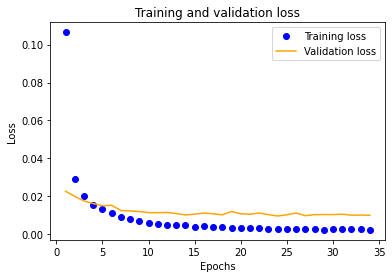

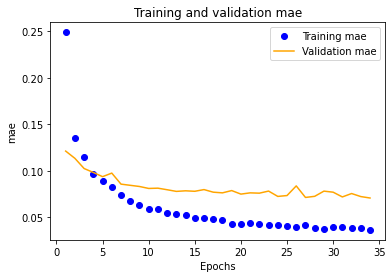


Scatter Plot to compare actual vs predicted

19/19 [==============================] - 0s 2ms/step


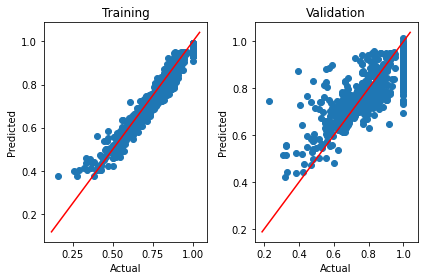


Evaluation Metrics

44/44 [==============================] - 0s 3ms/step

Mean Absolute Error
Train Data is 0.028
Test Data  is 0.073

R-squared
Train Data is 0.951
Test Data  is 0.653

Mean sqaured value
Train Data : 0.001
Test Data  : 0.010


In [67]:
df_neu=tf_idf(df,'tweet','neu')

##### Appending metrics into a frame

In [68]:
model_tfidf=pd.concat([df_compound,df_neg,df_pos,df_neu])
model_tfidf['model_name']='TF-IDF'
model_tfidf

,score_name,dataset,mae,R_sq,mse,model_name
0,compound,Training,0.069300,0.964012,0.007985,TF-IDF
1,compound,Validation,0.206769,0.626957,0.079098,TF-IDF
0,neg,Training,0.019591,0.903329,0.001041,TF-IDF
1,neg,Validation,0.048248,0.528754,0.005306,TF-IDF
0,pos,Training,0.019909,0.969082,0.000595,TF-IDF
1,pos,Validation,0.051947,0.769277,0.005216,TF-IDF
0,neu,Training,0.027804,0.950612,0.001200,TF-IDF
1,neu,Validation,0.072553,0.652539,0.009709,TF-IDF


###Model 2

Flattened word embeddings into a Dense Neural Network (pre-trained)

In [69]:
from keras.layers import Embedding

# The Embedding layer takes at least two arguments:
# the number of possible tokens, here 1000 (1 + maximum word index),
# and the dimensionality of the embeddings, here 64.
embedding_layer = Embedding(1000, 64)

#### Import the Glove Embeddings


Head to `https://nlp.stanford.edu/projects/glove/` (where you can learn more about the GloVe algorithm), and download the pre-computed 
embeddings from 2014 English Wikipedia. It's a 822MB zip file named `glove.6B.zip`, containing 100-dimensional embedding vectors for 
400,000 words (or non-word tokens). Un-zip it.

#### Pre-process the embeddings


Let's parse the un-zipped file (it's a `txt` file) to build an index mapping words (as strings) to their vector representation (as number 
vectors).

Reference: https://nlp.stanford.edu/data/glove.6B.zip

In [70]:
import os # Download and unzip glove word embeddings from opensource, This may take more time based on download speeds
!pip install wget
import wget # Using wget library to download 
wget.download('https://nlp.stanford.edu/data/glove.6B.zip') # Download the zip file
os.mkdir('/content/glove_unzip')
from zipfile import ZipFile
ZipFile("/content/glove.6B.zip").extractall("/content/glove_unzip") # Ectract files
embeddings_index = {}
f = open('/content/glove_unzip/glove.6B.100d.txt') # File path 
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs # Add coefficients to the dictionary as word index pair
f.close()

print(f'Found {len(embeddings_index)} word vectors.')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9674 sha256=9097c9cc3f6dd15a638df56d0e14844ab863c0966284a77b75161c87b2160232
  Stored in directory: /root/.cache/pip/wheels/bd/a8/c3/3cf2c14a1837a4e04bd98631724e81f33f462d86a1d895fae0
Successfully built wget
Found 400000 word vectors.


In [71]:
from keras.preprocessing.text import Tokenizer
#from keras.preprocessing.sequence import pad_sequences
import numpy as np

maxlen = 50  # We will cut reviews after 100 words
training_samples = int(np.round(len(df)*0.6))  # We will be training on X samples
validation_samples=int(np.round(len(df)*0.2))  # We will be validating on X samples
max_words = 10000  # We will only consider the top 10,000 words in the dataset

# we will use training_samples and validation_samples
# later on in a few cells... for splitting data...

In [72]:
X=list(df['tweet'])
y=df[['compound','neg','pos','neu']]

In [73]:
# link: https://keras.io/preprocessing/text/
# has good details on what a tokenizer does

# This class allows to vectorize a text corpus, by turning each text into either a sequence of integers
# omits common characters 
tokenizer = Tokenizer(num_words=max_words)

# fit_on_texts means it learns the indices of the words
tokenizer.fit_on_texts(X)

# the sequences are comprised of those indices
sequences = tokenizer.texts_to_sequences(X)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

# in case of low word counts, we need to pad sequences
# so that they are uniform length
data = pad_sequences(sequences, maxlen=maxlen)

# our labels, which were previously stored as a list [],
# are now converted to a numpy array for modeling
labels = np.asarray(y)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

Found 4372 unique tokens.
Shape of data tensor: (2002, 50)
Shape of label tensor: (2002, 4)


#### Train, Validation and Test splits

In [74]:
x_train = data[:training_samples] # from 0 to (200) training samples
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]
x_test = data[training_samples + validation_samples:]
y_test = labels[training_samples + validation_samples:]

In [75]:
embedding_dim = 100 # this is the dimension of the file we imported

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector


Now let's build an embedding matrix that we will be able to load into an `Embedding` layer. It must be a matrix of shape `(max_words, 
embedding_dim)`, where each entry `i` contains the `embedding_dim`-dimensional vector for the word of index `i` in our reference word index 
(built during tokenization). Note that the index `0` is not supposed to stand for any word or token -- it's a placeholder.

#### Model Building , compiling and Execution

In [76]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(4, activation='linear'))
model.summary()


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 50, 100)           1000000   
                                                                 
 flatten (Flatten)           (None, 5000)              0         
                                                                 
 dense_32 (Dense)            (None, 32)                160032    
                                                                 
 dense_33 (Dense)            (None, 4)                 132       
                                                                 
Total params: 1,160,164
Trainable params: 1,160,164
Non-trainable params: 0
_________________________________________________________________


Load the GloVe embeddings in the model


The `Embedding` layer has a single weight matrix: a 2D float matrix where each entry `i` is the word vector meant to be associated with 
index `i`. Simple enough. Let's just load the GloVe matrix we prepared into our `Embedding` layer, the first layer in our model:

In [77]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False


Additionally, we freeze the embedding layer (we set its `trainable` attribute to `False`), following the same rationale as what you are 
already familiar with in the context of pre-trained convnet features: when parts of a model are pre-trained (like our `Embedding` layer), 
and parts are randomly initialized (like our classifier), the pre-trained parts should not be updated during training to avoid forgetting 
what they already know. The large gradient update triggered by the randomly initialized layers would be very disruptive to the already 
learned features.

Let's compile our model and train it:

In [78]:
from keras.callbacks import EarlyStopping

In [79]:
model.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['mae'])
  # early stopping callback
es = EarlyStopping(monitor='val_loss',
                  mode='min',
                  patience=10, # you can choose a big value!
                  restore_best_weights = True) # don't forget this! otherwise it's potentially suboptimal weights

history = model.fit(x_train, y_train,
                    callbacks=[es],
                    epochs=300,
                    batch_size=5,
                    validation_data=(x_val, y_val),
                    shuffle=True,
                    verbose=1)
# saves on left hand side!


Epoch 1/300
241/241 [==============================] - 2s 5ms/step - loss: 0.1172 - mae: 0.2382 - val_loss: 0.1153 - val_mae: 0.2385
Epoch 2/300
241/241 [==============================] - 1s 5ms/step - loss: 0.0517 - mae: 0.1614 - val_loss: 0.0752 - val_mae: 0.1923
Epoch 3/300
241/241 [==============================] - 1s 4ms/step - loss: 0.0326 - mae: 0.1270 - val_loss: 0.0763 - val_mae: 0.1857
Epoch 4/300
241/241 [==============================] - 2s 8ms/step - loss: 0.0228 - mae: 0.1051 - val_loss: 0.0750 - val_mae: 0.1836
Epoch 5/300
241/241 [==============================] - 2s 9ms/step - loss: 0.0181 - mae: 0.0924 - val_loss: 0.0660 - val_mae: 0.1754
Epoch 6/300
241/241 [==============================] - 2s 8ms/step - loss: 0.0148 - mae: 0.0836 - val_loss: 0.0672 - val_mae: 0.1743
Epoch 7/300
241/241 [==============================] - 2s 8ms/step - loss: 0.0129 - mae: 0.0788 - val_loss: 0.0661 - val_mae: 0.1735
Epoch 8/300
241/241 [==============================] - 2s 8ms/step - 

In [80]:
model.save_weights('pre_trained_glove_model.h5')

#### Evaluation

##### Loss Curves


Loss curves for Test and Train Data based on model



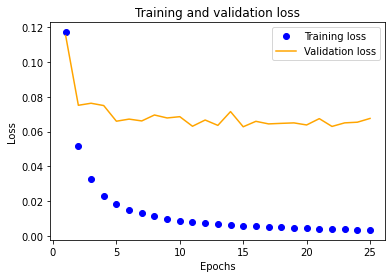

In [81]:
# Part 5 - Evaluation
print("\nLoss curves for Test and Train Data based on model\n")

# let's see the training and validation accuracy by epoch
history_dict = history.history
loss_values = history_dict['loss'] # you can change this
val_loss_values = history_dict['val_loss'] # you can also change this
epochs = range(1, len(loss_values) + 1) # range of X (no. of epochs)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

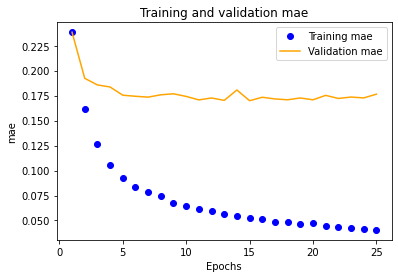

In [82]:
# let's see the training and validation accuracy by epoch
history_dict = history.history
loss_values = history_dict['mae'] # you can change this
val_loss_values = history_dict['val_mae'] # you can also change this
epochs = range(1, len(loss_values) + 1) # range of X (no. of epochs)
plt.plot(epochs, loss_values, 'bo', label='Training mae')
plt.plot(epochs, val_loss_values, 'orange', label='Validation mae')
plt.title('Training and validation mae')
plt.xlabel('Epochs')
plt.ylabel('mae')
plt.legend()
plt.show()

In [83]:
pred_train=model.predict(x_train)
pred_val=model.predict(x_val)
pred_test=model.predict(x_test)

13/13 [==============================] - 0s 2ms/step


##### Evaluation Metrics function

In [84]:
#create a dictionary to use in the function 
y_dict={'compound':0,'neg':1,'pos':2,'neu':3}
y_dict['compound']

0

Function

In [85]:
def eval(y_col):

  from matplotlib.pyplot import figure
  #fig=figure(figsize=(8, 8))
  
  #y_dict={'compound':0,'neg':1,'pos':2,'neu':3}

  # Part 6 - Scatter Plots

  print("\nScatter Plot to compare actual vs predicted\n")

  # scatterplot of actual vs. pred
  # specify the dimensions 
  # https://dev.to/thalesbruno/subplotting-with-matplotlib-and-seaborn-5ei8
  
  fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
  #fig, axes = plt.subplots(1,3) # 1 row, 3 columns

  # this makes the individual subplots
  # Training Results
  x1=y_train[:,y_dict[y_col]:y_dict[y_col]+1]
  y1=pred_train[:,y_dict[y_col]:y_dict[y_col]+1]
  axes[0].scatter(x=x1, y=y1) #first row, first entry (left top)
  axes[0].set_xlabel("Actual", fontsize=10)
  axes[0].set_ylabel("Predicted",  fontsize=10)
  axes[0].set_title("Training")
  # add 45 deg line
  x = np.linspace(*axes[0].get_xlim())
  axes[0].plot(x, x, color='red')

  # Validation Results
  x2=y_val[:,y_dict[y_col]:y_dict[y_col]+1]
  y2=pred_val[:,y_dict[y_col]:y_dict[y_col]+1]
  axes[1].scatter(x=x2,y=y2) #first row, second entry (Middle Top)
  axes[1].set_xlabel("Actual", fontsize=10)
  axes[1].set_ylabel("Predicted",  fontsize=10)
  axes[1].set_title("Validation")
  # add 45 deg line
  x = np.linspace(*axes[1].get_xlim())
  axes[1].plot(x, x, color='red')
  
  # Test Results
  x3=y_test[:,y_dict[y_col]:y_dict[y_col]+1]
  y3=pred_test[:,y_dict[y_col]:y_dict[y_col]+1]
  axes[2].scatter(x=x3,y=y3) #first row, second entry (Middle Top)
  axes[2].set_xlabel("Actual", fontsize=10)
  axes[2].set_ylabel("Predicted",  fontsize=10)
  axes[2].set_title("Test")
  # add 45 deg line
  x = np.linspace(*axes[2].get_xlim())
  axes[2].plot(x, x, color='red')
  # tight layout
  fig.tight_layout()

  # show the plot
  plt.show()

  # metrics

  print("\nEvaluation Metrics\n")

  from sklearn.metrics import mean_absolute_error
  from sklearn.metrics import r2_score
  from sklearn.metrics import mean_squared_error

  test = pd.DataFrame()
  test['score_name']=[y_col,y_col,y_col]
  test['dataset']=['Training','Validation','Test']
  test['mae']=[mean_absolute_error(y_train[:,y_dict[y_col]:y_dict[y_col]+1], pred_train[:,y_dict[y_col]:y_dict[y_col]+1]),
               mean_absolute_error(y_val[:,y_dict[y_col]:y_dict[y_col]+1], pred_val[:,y_dict[y_col]:y_dict[y_col]+1]),
               mean_absolute_error(y_test[:,y_dict[y_col]:y_dict[y_col]+1], pred_test[:,y_dict[y_col]:y_dict[y_col]+1])]

  test['R_sq']=[r2_score(y_train[:,y_dict[y_col]:y_dict[y_col]+1], pred_train[:,y_dict[y_col]:y_dict[y_col]+1]),
               r2_score(y_val[:,y_dict[y_col]:y_dict[y_col]+1], pred_val[:,y_dict[y_col]:y_dict[y_col]+1]),
               r2_score(y_test[:,y_dict[y_col]:y_dict[y_col]+1], pred_test[:,y_dict[y_col]:y_dict[y_col]+1])]

  test['mse']=[mean_squared_error(y_train[:,y_dict[y_col]:y_dict[y_col]+1], pred_train[:,y_dict[y_col]:y_dict[y_col]+1]),
               mean_squared_error(y_val[:,y_dict[y_col]:y_dict[y_col]+1], pred_val[:,y_dict[y_col]:y_dict[y_col]+1]),
               mean_squared_error(y_test[:,y_dict[y_col]:y_dict[y_col]+1], pred_test[:,y_dict[y_col]:y_dict[y_col]+1])]

  print("\nMean Absolute Error")
  print("Train Data is {:0.3f}".format(mean_absolute_error(y_train[:,y_dict[y_col]:y_dict[y_col]+1], pred_train[:,y_dict[y_col]:y_dict[y_col]+1]))) # train
  print("Validation Data  is {:0.3f}".format(mean_absolute_error(y_val[:,y_dict[y_col]:y_dict[y_col]+1], pred_val[:,y_dict[y_col]:y_dict[y_col]+1]))) # validation
  print("Test Data  is {:0.3f}".format(mean_absolute_error(y_test[:,y_dict[y_col]:y_dict[y_col]+1], pred_test[:,y_dict[y_col]:y_dict[y_col]+1]))) # test

  print("\nR-squared")
  print("Train Data is {:0.3f}".format(r2_score(y_train[:,y_dict[y_col]:y_dict[y_col]+1], pred_train[:,y_dict[y_col]:y_dict[y_col]+1]))) # train
  print("Validation Data  is {:0.3f}".format(r2_score(y_val[:,y_dict[y_col]:y_dict[y_col]+1], pred_val[:,y_dict[y_col]:y_dict[y_col]+1]))) # Validation
  print("Test Data  is {:0.3f}".format(r2_score(y_test[:,y_dict[y_col]:y_dict[y_col]+1], pred_test[:,y_dict[y_col]:y_dict[y_col]+1]))) # test

  print("\nMean sqaured value")
  print("Train Data : {:0.3f}".format(mean_squared_error(y_train[:,y_dict[y_col]:y_dict[y_col]+1], pred_train[:,y_dict[y_col]:y_dict[y_col]+1]))) # train
  print("Validation Data  : {:0.3f}".format(mean_squared_error(y_val[:,y_dict[y_col]:y_dict[y_col]+1], pred_val[:,y_dict[y_col]:y_dict[y_col]+1]))) # validation
  print("Test Data  : {:0.3f}".format(mean_squared_error(y_test[:,y_dict[y_col]:y_dict[y_col]+1], pred_test[:,y_dict[y_col]:y_dict[y_col]+1]))) # test

  return test

##### Compound


Scatter Plot to compare actual vs predicted



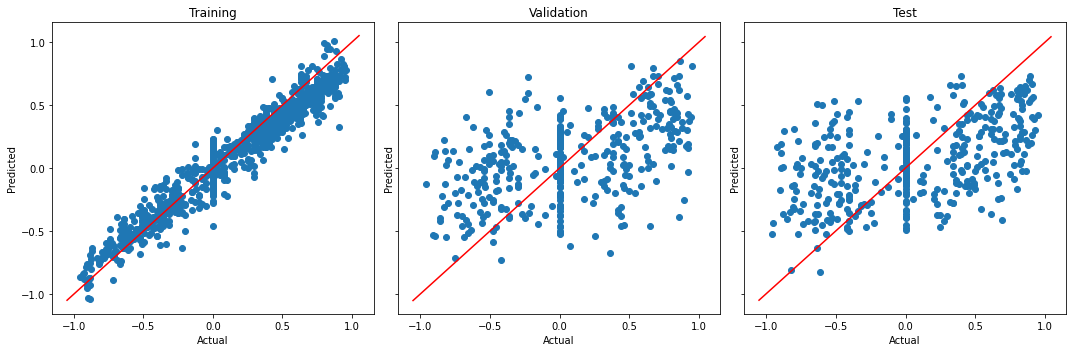


Evaluation Metrics


Mean Absolute Error
Train Data is 0.094
Validation Data  is 0.344
Test Data  is 0.367

R-squared
Train Data is 0.924
Validation Data  is 0.219
Test Data  is 0.235

Mean sqaured value
Train Data : 0.015
Validation Data  : 0.186
Test Data  : 0.208


In [86]:
df_compound=eval('compound')

##### Negative


Scatter Plot to compare actual vs predicted



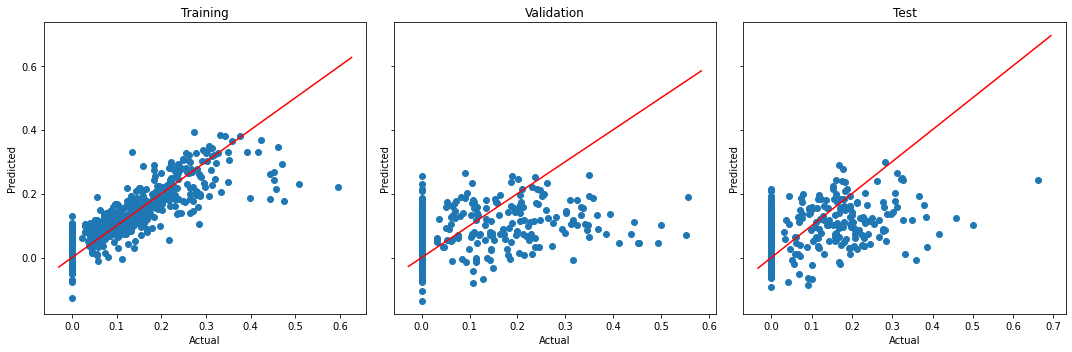


Evaluation Metrics


Mean Absolute Error
Train Data is 0.034
Validation Data  is 0.086
Test Data  is 0.078

R-squared
Train Data is 0.755
Validation Data  is 0.070
Test Data  is 0.142

Mean sqaured value
Train Data : 0.002
Validation Data  : 0.013
Test Data  : 0.010


In [87]:
df_neg=eval('neg')

##### Neutral


Scatter Plot to compare actual vs predicted



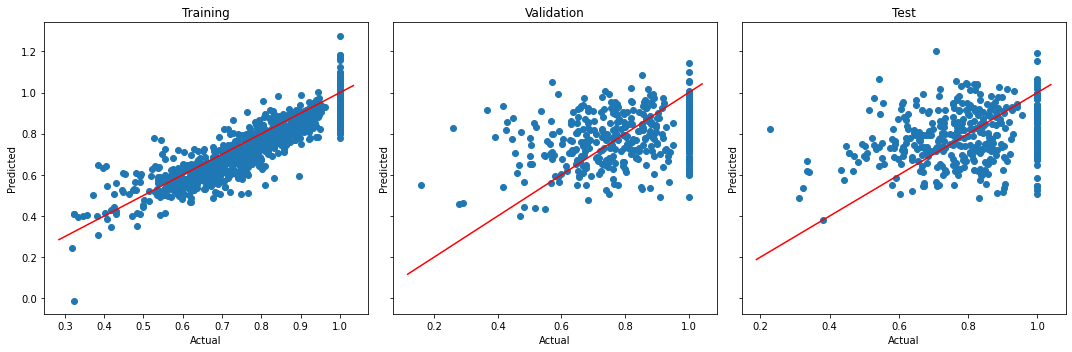


Evaluation Metrics


Mean Absolute Error
Train Data is 0.055
Validation Data  is 0.140
Test Data  is 0.142

R-squared
Train Data is 0.787
Validation Data  is -0.109
Test Data  is -0.271

Mean sqaured value
Train Data : 0.005
Validation Data  : 0.031
Test Data  : 0.031


In [88]:
df_neu=eval('neu')

##### Positive


Scatter Plot to compare actual vs predicted



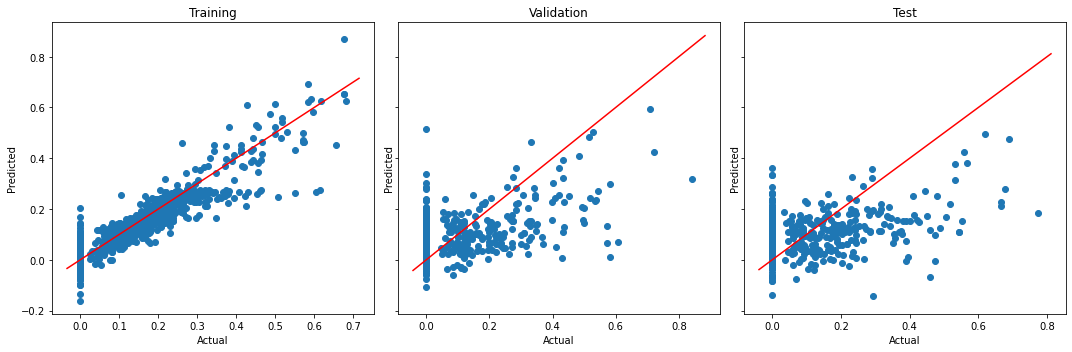


Evaluation Metrics


Mean Absolute Error
Train Data is 0.033
Validation Data  is 0.110
Test Data  is 0.110

R-squared
Train Data is 0.864
Validation Data  is 0.183
Test Data  is 0.100

Mean sqaured value
Train Data : 0.002
Validation Data  : 0.020
Test Data  : 0.021


In [89]:
df_pos=eval('pos')

##### Appending metrics into a frame

In [90]:
model_embedding=pd.concat([df_compound,df_neg,df_pos,df_neu])
model_embedding['model_name']='Pre-trained Embeddings DNN'
model_embedding

,score_name,dataset,mae,R_sq,mse,model_name
0,compound,Training,0.093965,0.923884,0.014629,Pre-trained Embeddings DNN
1,compound,Validation,0.344465,0.219385,0.186147,Pre-trained Embeddings DNN
2,compound,Test,0.366865,0.234628,0.207720,Pre-trained Embeddings DNN
0,neg,Training,0.034241,0.755035,0.002258,Pre-trained Embeddings DNN
1,neg,Validation,0.086093,0.070132,0.013349,Pre-trained Embeddings DNN
2,neg,Test,0.078346,0.142358,0.010470,Pre-trained Embeddings DNN
0,pos,Training,0.033242,0.864157,0.002381,Pre-trained Embeddings DNN
1,pos,Validation,0.109605,0.182762,0.020336,Pre-trained Embeddings DNN
2,pos,Test,0.110127,0.100215,0.021396,Pre-trained Embeddings DNN
0,neu,Training,0.055476,0.787380,0.005217,Pre-trained Embeddings DNN


###Model 3

DL model with at least one recurrent layer and other things we learned from class.

1. LSTM, GRU or SimpleRNN
2. Bidirectional LSTM or GRU
3. 1D Conv and Pooling
4. Stacked layers etc.

You are welcome to try pre-trained word embeddings but are not required to.

##### Defining Parameters

In [91]:
#https://stackoverflow.com/questions/49984905/count-number-of-words-per-row

df['totalwords'] = df['tweet'].str.count(' ') + 1
df['totalwords'].mean()

20.824675324675326

In [92]:
print("Total words in the tweet column",df['totalwords'].sum())

Total words in the tweet column 41691


Average words in each tweet is 21

In [93]:
from keras.layers import SimpleRNN
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer

In [94]:
X=list(df['tweet'])
y=df[['compound','neg','pos','neu']]

1.   Maximum words in a sentence to consdier for modeling - 30
2.   Maximum features to consider for modeling from entire dataset - 10000 ( Top 10000)
3.   Batch size - 10



In [95]:
from keras.datasets import imdb
from keras.utils import pad_sequences

max_features = 10000  # number of words to consider as features
maxlen = 30  # cut texts after this number of words (among top max_features most common words)
batch_size = 10

##### Tokeinzation of words

In [96]:
# link: https://keras.io/preprocessing/text/
# has good details on what a tokenizer does

# This class allows to vectorize a text corpus, by turning each text into either a sequence of integers
# omits common characters 
tokenizer = Tokenizer(num_words=maxlen)

# fit_on_texts means it learns the indices of the words
tokenizer.fit_on_texts(X)

# the sequences are comprised of those indices
sequences = tokenizer.texts_to_sequences(X)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

# in case of low word counts, we need to pad sequences
# so that they are uniform length
data = pad_sequences(sequences, maxlen=maxlen)

# our labels, which were previously stored as a list [],
# are now converted to a numpy array for modeling
labels = np.asarray(y)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

Found 4372 unique tokens.
Shape of data tensor: (2002, 30)
Shape of label tensor: (2002, 4)


#### Train, Validation and Test splits

In [97]:
training_samples = int(np.round(len(df)*0.6))  # We will be training on X samples
validation_samples=int(np.round(len(df)*0.2))  # We will be validating on X samples

x_train = data[:training_samples] # from 0 to (200) training samples
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]
x_test = data[training_samples + validation_samples:]
y_test = labels[training_samples + validation_samples:]

In [98]:
from keras.datasets import imdb
from keras.utils import pad_sequences

max_features = 10000  # number of words to consider as features
maxlen = 30  # cut texts after this number of words (among top max_features most common words)
batch_size = 10

print('Loading data...')

print(len(x_train), 'train sequences')
print(len(x_val), 'Validation sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = pad_sequences(x_train, maxlen=maxlen)
x_val = pad_sequences(x_val, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)
print('X Train shape:', x_train.shape)
print('X Val shape:', x_val.shape)
print('X Test shape:', x_test.shape)

Loading data...
1201 train sequences
400 Validation sequences
401 test sequences
Pad sequences (samples x time)
X Train shape: (1201, 30)
X Val shape: (400, 30)
X Test shape: (401, 30)


##### Model building, compiling and execution

In [99]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

In [100]:
from keras.layers import LSTM, Dropout, GRU, Conv1D, MaxPooling1D, Bidirectional

model = Sequential()
model.add(Embedding(max_features, 128, input_length=maxlen)) #10k common words, 128d, 30 words
model.add(Conv1D(filters=32, kernel_size=3))
model.add(MaxPooling1D(2))
model.add(Bidirectional(LSTM(30,
                            return_sequences=True, 
                            activation='relu',
                            recurrent_dropout=0.3)))
model.add(GRU(32, activation='relu', recurrent_dropout=0.2)) # 1 row with 32 columns (dense vector for prediction)
model.add(Dropout(0.2))
model.add(Dense(4, activation='linear'))
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 30, 128)           1280000   
                                                                 
 conv1d (Conv1D)             (None, 28, 32)            12320     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 14, 32)           0         
 )                                                               
                                                                 
 bidirectional (Bidirectiona  (None, 14, 60)           15120     
 l)                                                              
                                                                 
 gru (GRU)                   (None, 32)                9024      
                                                                 
 dropout_16 (Dropout)        (None, 32)               

In [101]:
model.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['mae'])

es = EarlyStopping(monitor='val_loss',
                  mode='min',
                  patience=10, # you can choose a big value!
                  restore_best_weights = True) # don't forget this! otherwise it's potentially suboptimal weights

history = model.fit(x_train, y_train,
                    callbacks=[es],
                    epochs=300,
                    batch_size=5,
                    validation_data=(x_val, y_val),
                    shuffle=True,
                    verbose=1)
# saves on left hand side!

Epoch 1/300
241/241 [==============================] - 17s 41ms/step - loss: 0.0734 - mae: 0.1896 - val_loss: 0.0809 - val_mae: 0.1911
Epoch 2/300
241/241 [==============================] - 9s 37ms/step - loss: 0.0640 - mae: 0.1736 - val_loss: 0.0767 - val_mae: 0.1881
Epoch 3/300
241/241 [==============================] - 9s 37ms/step - loss: 0.0585 - mae: 0.1639 - val_loss: 0.0719 - val_mae: 0.1825
Epoch 4/300
241/241 [==============================] - 10s 42ms/step - loss: 0.0550 - mae: 0.1583 - val_loss: 0.0739 - val_mae: 0.1844
Epoch 5/300
241/241 [==============================] - 9s 37ms/step - loss: 0.0514 - mae: 0.1532 - val_loss: 0.0715 - val_mae: 0.1835
Epoch 6/300
241/241 [==============================] - 9s 36ms/step - loss: 0.0487 - mae: 0.1485 - val_loss: 0.0728 - val_mae: 0.1817
Epoch 7/300
241/241 [==============================] - 12s 49ms/step - loss: 0.0459 - mae: 0.1451 - val_loss: 0.0704 - val_mae: 0.1806
Epoch 8/300
241/241 [==============================] - 9s 3

##### Loss curves
Let's plot its performance over time:


Loss curves for Test and Train Data based on model



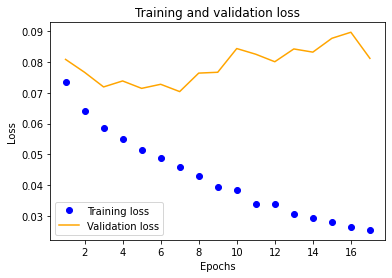

In [102]:
print("\nLoss curves for Test and Train Data based on model\n")

# let's see the training and validation accuracy by epoch
history_dict = history.history
loss_values = history_dict['loss'] # you can change this
val_loss_values = history_dict['val_loss'] # you can also change this
epochs = range(1, len(loss_values) + 1) # range of X (no. of epochs)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

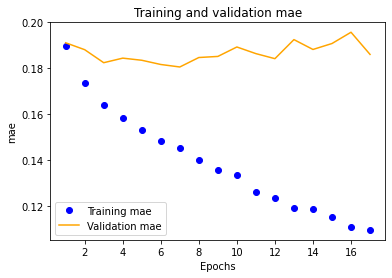

In [103]:
# let's see the training and validation accuracy by epoch
history_dict = history.history
loss_values = history_dict['mae'] # you can change this
val_loss_values = history_dict['val_mae'] # you can also change this
epochs = range(1, len(loss_values) + 1) # range of X (no. of epochs)
plt.plot(epochs, loss_values, 'bo', label='Training mae')
plt.plot(epochs, val_loss_values, 'orange', label='Validation mae')
plt.title('Training and validation mae')
plt.xlabel('Epochs')
plt.ylabel('mae')
plt.legend()
plt.show()

In [104]:
pred_train=model.predict(x_train)
pred_val=model.predict(x_val)
pred_test=model.predict(x_test)

13/13 [==============================] - 0s 10ms/step


##### Evaluation Metrics function

In [105]:
y_dict={'compound':0,'neg':1,'pos':2,'neu':3}
y_dict['compound']

0

In [106]:
from matplotlib.pyplot import figure

figure(figsize=(10, 6), dpi=80)

<Figure size 800x480 with 0 Axes>

<Figure size 800x480 with 0 Axes>

Function

In [107]:
def eval(y_col):

  from matplotlib.pyplot import figure
  #fig=figure(figsize=(8, 8))
  
  #y_dict={'compound':0,'neg':1,'pos':2,'neu':3}

  # Part 6 - Scatter Plots

  print("\nScatter Plot to compare actual vs predicted\n")

  # scatterplot of actual vs. pred
  # specify the dimensions 
  # https://dev.to/thalesbruno/subplotting-with-matplotlib-and-seaborn-5ei8
  
  fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
  #fig, axes = plt.subplots(1,3) # 1 row, 3 columns

  # this makes the individual subplots
  # Training Results
  x1=y_train[:,y_dict[y_col]:y_dict[y_col]+1]
  y1=pred_train[:,y_dict[y_col]:y_dict[y_col]+1]
  axes[0].scatter(x=x1, y=y1) #first row, first entry (left top)
  axes[0].set_xlabel("Actual", fontsize=10)
  axes[0].set_ylabel("Predicted",  fontsize=10)
  axes[0].set_title("Training")
  # add 45 deg line
  x = np.linspace(*axes[0].get_xlim())
  axes[0].plot(x, x, color='red')

  # Validation Results
  x2=y_val[:,y_dict[y_col]:y_dict[y_col]+1]
  y2=pred_val[:,y_dict[y_col]:y_dict[y_col]+1]
  axes[1].scatter(x=x2,y=y2) #first row, second entry (Middle Top)
  axes[1].set_xlabel("Actual", fontsize=10)
  axes[1].set_ylabel("Predicted",  fontsize=10)
  axes[1].set_title("Validation")
  # add 45 deg line
  x = np.linspace(*axes[1].get_xlim())
  axes[1].plot(x, x, color='red')
  
  # Test Results
  x3=y_test[:,y_dict[y_col]:y_dict[y_col]+1]
  y3=pred_test[:,y_dict[y_col]:y_dict[y_col]+1]
  axes[2].scatter(x=x3,y=y3) #first row, second entry (Middle Top)
  axes[2].set_xlabel("Actual", fontsize=10)
  axes[2].set_ylabel("Predicted",  fontsize=10)
  axes[2].set_title("Test")
  # add 45 deg line
  x = np.linspace(*axes[2].get_xlim())
  axes[2].plot(x, x, color='red')
  # tight layout
  fig.tight_layout()

  # show the plot
  plt.show()

  # metrics

  print("\nEvaluation Metrics\n")

  from sklearn.metrics import mean_absolute_error
  from sklearn.metrics import r2_score
  from sklearn.metrics import mean_squared_error


  test = pd.DataFrame()
  test['score_name']=[y_col,y_col,y_col]
  test['dataset']=['Training','Validation','Test']
  test['mae']=[mean_absolute_error(y_train[:,y_dict[y_col]:y_dict[y_col]+1], pred_train[:,y_dict[y_col]:y_dict[y_col]+1]),
               mean_absolute_error(y_val[:,y_dict[y_col]:y_dict[y_col]+1], pred_val[:,y_dict[y_col]:y_dict[y_col]+1]),
               mean_absolute_error(y_test[:,y_dict[y_col]:y_dict[y_col]+1], pred_test[:,y_dict[y_col]:y_dict[y_col]+1])]

  test['R_sq']=[r2_score(y_train[:,y_dict[y_col]:y_dict[y_col]+1], pred_train[:,y_dict[y_col]:y_dict[y_col]+1]),
               r2_score(y_val[:,y_dict[y_col]:y_dict[y_col]+1], pred_val[:,y_dict[y_col]:y_dict[y_col]+1]),
               r2_score(y_test[:,y_dict[y_col]:y_dict[y_col]+1], pred_test[:,y_dict[y_col]:y_dict[y_col]+1])]
               
  test['mse']=[mean_squared_error(y_train[:,y_dict[y_col]:y_dict[y_col]+1], pred_train[:,y_dict[y_col]:y_dict[y_col]+1]),
               mean_squared_error(y_val[:,y_dict[y_col]:y_dict[y_col]+1], pred_val[:,y_dict[y_col]:y_dict[y_col]+1]),
               mean_squared_error(y_test[:,y_dict[y_col]:y_dict[y_col]+1], pred_test[:,y_dict[y_col]:y_dict[y_col]+1])]

  print("\nMean Absolute Error")
  print("Train Data is {:0.3f}".format(mean_absolute_error(y_train[:,y_dict[y_col]:y_dict[y_col]+1], pred_train[:,y_dict[y_col]:y_dict[y_col]+1]))) # train
  print("Validation Data  is {:0.3f}".format(mean_absolute_error(y_val[:,y_dict[y_col]:y_dict[y_col]+1], pred_val[:,y_dict[y_col]:y_dict[y_col]+1]))) # validation
  print("Test Data  is {:0.3f}".format(mean_absolute_error(y_test[:,y_dict[y_col]:y_dict[y_col]+1], pred_test[:,y_dict[y_col]:y_dict[y_col]+1]))) # test

  print("\nR-squared")
  print("Train Data is {:0.3f}".format(r2_score(y_train[:,y_dict[y_col]:y_dict[y_col]+1], pred_train[:,y_dict[y_col]:y_dict[y_col]+1]))) # train
  print("Validation Data  is {:0.3f}".format(r2_score(y_val[:,y_dict[y_col]:y_dict[y_col]+1], pred_val[:,y_dict[y_col]:y_dict[y_col]+1]))) # Validation
  print("Test Data  is {:0.3f}".format(r2_score(y_test[:,y_dict[y_col]:y_dict[y_col]+1], pred_test[:,y_dict[y_col]:y_dict[y_col]+1]))) # test

  print("\nMean sqaured value")
  print("Train Data : {:0.3f}".format(mean_squared_error(y_train[:,y_dict[y_col]:y_dict[y_col]+1], pred_train[:,y_dict[y_col]:y_dict[y_col]+1]))) # train
  print("Validation Data  : {:0.3f}".format(mean_squared_error(y_val[:,y_dict[y_col]:y_dict[y_col]+1], pred_val[:,y_dict[y_col]:y_dict[y_col]+1]))) # validation
  print("Test Data  : {:0.3f}".format(mean_squared_error(y_test[:,y_dict[y_col]:y_dict[y_col]+1], pred_test[:,y_dict[y_col]:y_dict[y_col]+1]))) # test

  return test


##### Compound


Scatter Plot to compare actual vs predicted



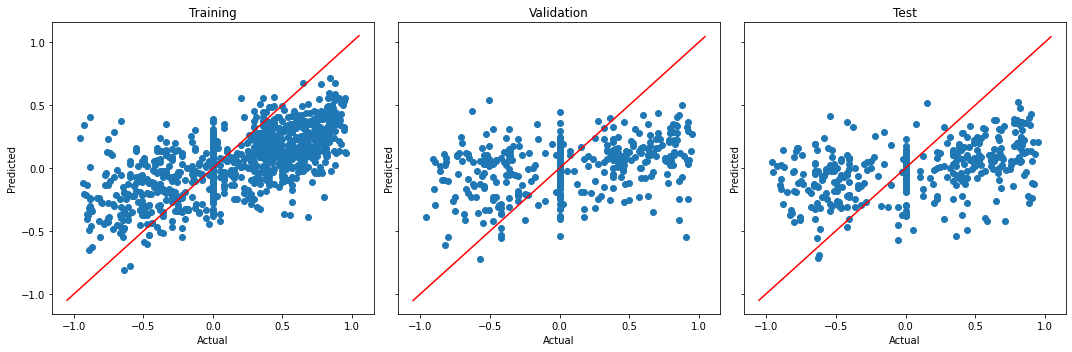


Evaluation Metrics


Mean Absolute Error
Train Data is 0.275
Validation Data  is 0.378
Test Data  is 0.398

R-squared
Train Data is 0.375
Validation Data  is 0.097
Test Data  is 0.159

Mean sqaured value
Train Data : 0.120
Validation Data  : 0.215
Test Data  : 0.228


In [108]:
df_compound=eval('compound')

##### Negative


Scatter Plot to compare actual vs predicted



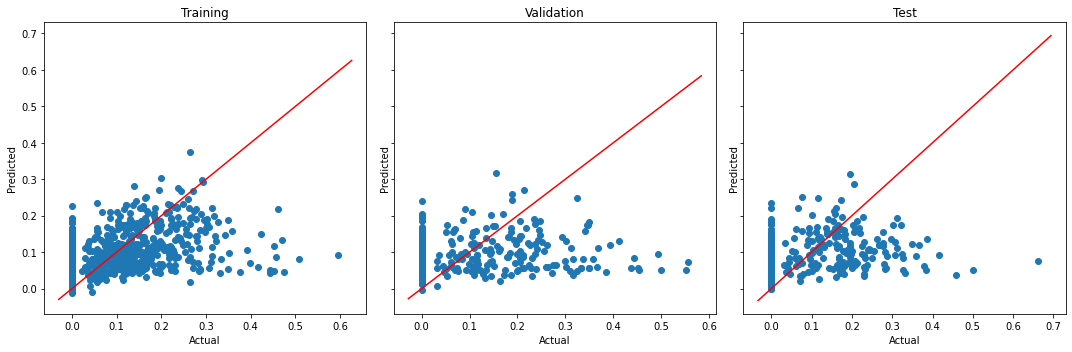


Evaluation Metrics


Mean Absolute Error
Train Data is 0.064
Validation Data  is 0.087
Test Data  is 0.081

R-squared
Train Data is 0.243
Validation Data  is 0.040
Test Data  is 0.066

Mean sqaured value
Train Data : 0.007
Validation Data  : 0.014
Test Data  : 0.011


In [109]:
df_neg=eval('neg')

##### Neutral


Scatter Plot to compare actual vs predicted



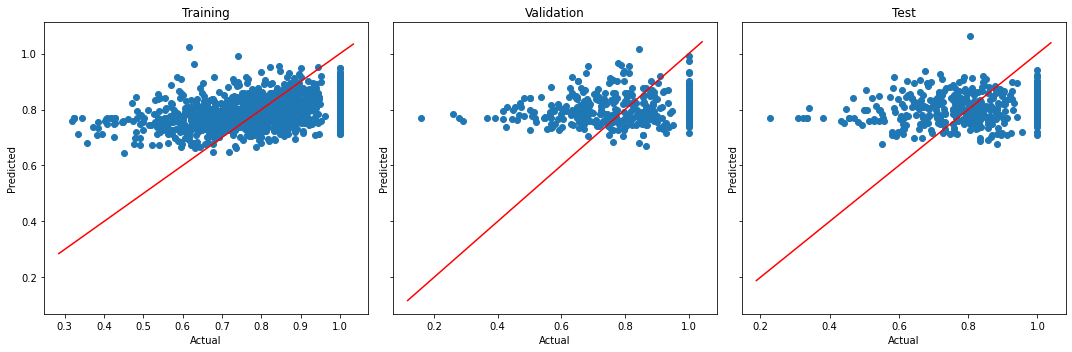


Evaluation Metrics


Mean Absolute Error
Train Data is 0.119
Validation Data  is 0.141
Test Data  is 0.132

R-squared
Train Data is 0.135
Validation Data  is -0.016
Test Data  is -0.063

Mean sqaured value
Train Data : 0.021
Validation Data  : 0.029
Test Data  : 0.026


In [110]:
df_neu=eval('neu')

##### Positive


Scatter Plot to compare actual vs predicted



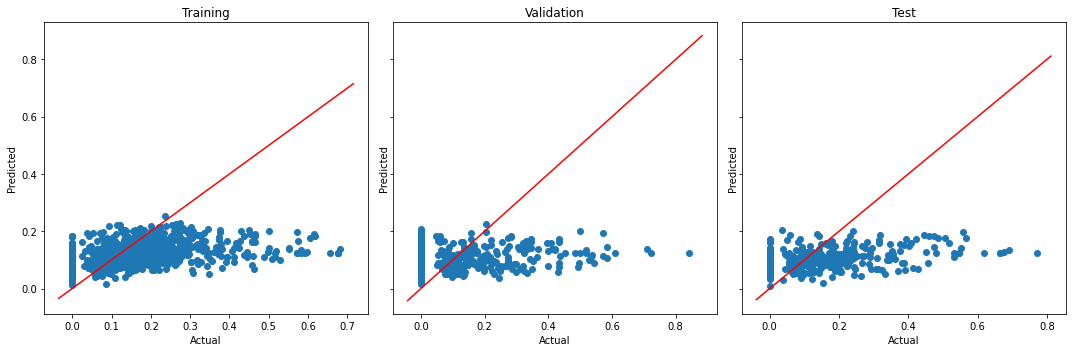


Evaluation Metrics


Mean Absolute Error
Train Data is 0.089
Validation Data  is 0.117
Test Data  is 0.110

R-squared
Train Data is 0.184
Validation Data  is 0.042
Test Data  is 0.078

Mean sqaured value
Train Data : 0.014
Validation Data  : 0.024
Test Data  : 0.022


In [111]:
df_pos=eval('pos')

##### Appending metrics into a frame

In [112]:
model_rnn=pd.concat([df_compound,df_neg,df_pos,df_neu])
model_rnn['model_name']='RNN Monster'
model_rnn

,score_name,dataset,mae,R_sq,mse,model_name
0,compound,Training,0.274547,0.375190,0.120083,RNN Monster
1,compound,Validation,0.377733,0.097048,0.215320,RNN Monster
2,compound,Test,0.397979,0.158664,0.228336,RNN Monster
0,neg,Training,0.063696,0.242649,0.006982,RNN Monster
1,neg,Validation,0.087329,0.040418,0.013776,RNN Monster
2,neg,Test,0.081226,0.066281,0.011399,RNN Monster
0,pos,Training,0.089497,0.184069,0.014299,RNN Monster
1,pos,Validation,0.116620,0.041887,0.023841,RNN Monster
2,pos,Test,0.110419,0.078337,0.021916,RNN Monster
0,neu,Training,0.118880,0.135074,0.021223,RNN Monster


## Part III - Analysis

#### Model Comparison

In [113]:
model_results=pd.concat([model_cv,model_tfidf,model_embedding,model_rnn])
model_results

,score_name,dataset,mae,R_sq,mse,model_name
0,compound,Training,0.066315,0.962116,0.008270,Count-Vector
1,compound,Validation,0.204039,0.650453,0.076978,Count-Vector
0,neg,Training,0.018810,0.877017,0.001287,Count-Vector
1,neg,Validation,0.045709,0.490472,0.006093,Count-Vector
0,pos,Training,0.028686,0.913171,0.001844,Count-Vector
1,pos,Validation,0.062678,0.560761,0.007892,Count-Vector
0,neu,Training,0.028574,0.943614,0.001427,Count-Vector
1,neu,Validation,0.076135,0.534939,0.011968,Count-Vector
0,compound,Training,0.069300,0.964012,0.007985,TF-IDF
1,compound,Validation,0.206769,0.626957,0.079098,TF-IDF


MAE

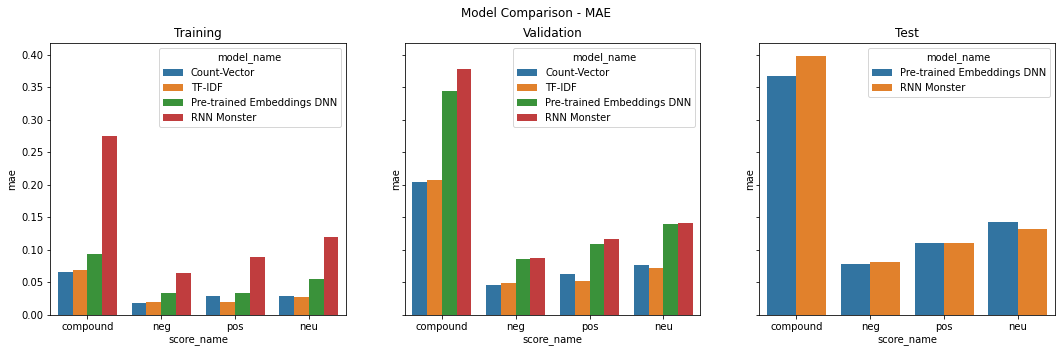

In [114]:
import seaborn as sns
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)
fig.suptitle('Model Comparison - MAE')

# Training
sns.barplot(ax=axes[0],data=model_results[model_results['dataset']=='Training'],x='score_name',y='mae',hue='model_name')
axes[0].set_title('Training')

# Validation
sns.barplot(ax=axes[1],data=model_results[model_results['dataset']=='Validation'],x='score_name',y='mae',hue='model_name')
axes[1].set_title('Validation')

# Test
sns.barplot(ax=axes[2],data=model_results[model_results['dataset']=='Test'],x='score_name',y='mae',hue='model_name')
axes[2].set_title('Test')

plt.show()

MSE

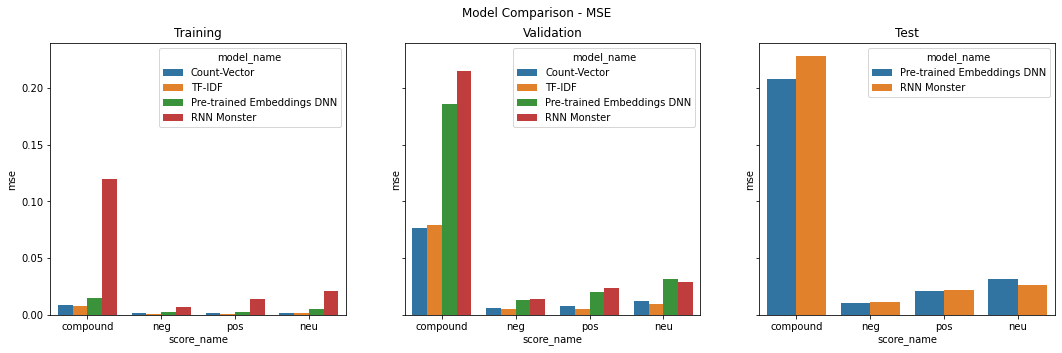

In [115]:
import seaborn as sns
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)
fig.suptitle('Model Comparison - MSE')

# Training
sns.barplot(ax=axes[0],data=model_results[model_results['dataset']=='Training'],x='score_name',y='mse',hue='model_name')
axes[0].set_title('Training')

# Validation
sns.barplot(ax=axes[1],data=model_results[model_results['dataset']=='Validation'],x='score_name',y='mse',hue='model_name')
axes[1].set_title('Validation')

# Test
sns.barplot(ax=axes[2],data=model_results[model_results['dataset']=='Test'],x='score_name',y='mse',hue='model_name')
axes[2].set_title('Test')

plt.show()

R-Squared

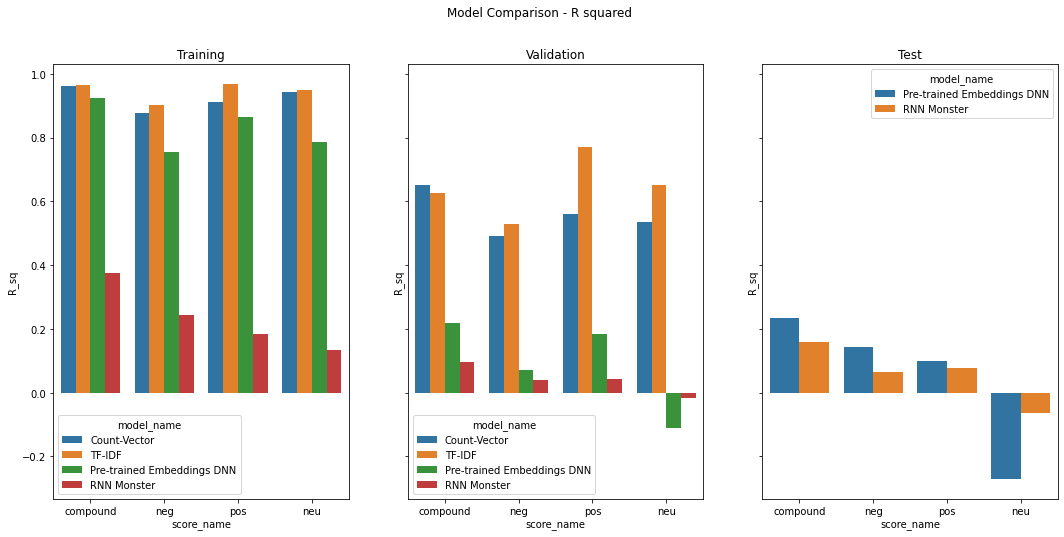

In [116]:
import seaborn as sns
fig, axes = plt.subplots(1, 3, figsize=(18, 8), sharey=True)
fig.suptitle('Model Comparison - R squared')

# Training
sns.barplot(ax=axes[0],data=model_results[model_results['dataset']=='Training'],x='score_name',y='R_sq',hue='model_name')
axes[0].set_title('Training')

# Validation
sns.barplot(ax=axes[1],data=model_results[model_results['dataset']=='Validation'],x='score_name',y='R_sq',hue='model_name')
axes[1].set_title('Validation')

# Test
sns.barplot(ax=axes[2],data=model_results[model_results['dataset']=='Test'],x='score_name',y='R_sq',hue='model_name')
axes[2].set_title('Test')

plt.show()

#### **Observations**:

1.   Based on above graphs we can see that for our dataset, MSE and MAE are lowest for TF-IDF related model and R-squared is highest for the same in both training and validation datasets
2.   For the dataset used, IDF tokenizer is capturing more information which may be because of the simple language in tweets compared to movie reviews or lyrics where one word might have different meanings in different sentences
3.   Even the best model seems to be overfit for training dataset with R-squared value for training close to 90% and for validation - it is close to 60%
4.   Model can be further enhanced by 
    > Increasing the data fed into the model

    > In above model, performance improved when batch size was increased to 10 instead of 5. So changing batch size has shown clear improvement

    > With the limited data, IDF is capturing more information than pre-trained embeddings. If we could remove more unwanted characters(like emojis) in the dataset using exploration, model performance could be improved
5. Our Deep learning model for this dataset is not able to perfectly steal the SentimentIntensityAnalyzer() algorithm. With more data fed, data cleaning and hyper parameter tuning - model performance can be improved


**Deep Learning vs Rule based algorithms**

1.   In Rule based algorithms like SentimentIntensityAnalyzer, there is a pre-defined rules on what each word/combination of words to be considered as. A human intervention is required in order to build these rules. Over time, rules might have to be enhanced, corrected or appended.
2.   In machine learning algorithms, we are training machine to learn the information from the text using either count, importance(tf idf) or sequence of words. Even though these models require huge training dataset, no human is involved and once the model is built, it can be used by anyone
3. Another huge advantage with deep learning models is sequence of words can be controlled to get relevant information from the text

Rule based algorithms are helpful for articles/journals where grammar in the text is accurate. But for analysing social media content, movie reviews and any unstructured data - deep learning models can be really helpful and does the job without any human intervention


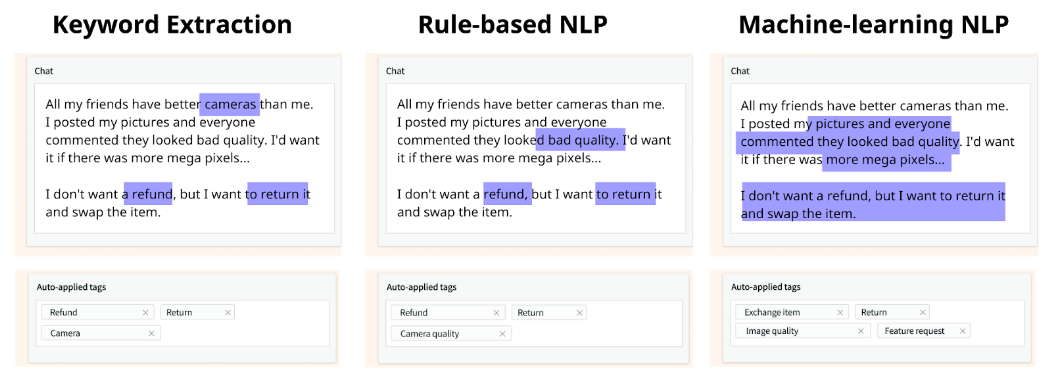

**References:**

https://www.emerald.com/insight/content/doi/10.1016/j.aci.2019.02.002/full/html

https://www.sentisum.com/success-article/machine-learning-nlp

https://medium.com/friendly-data/machine-learning-vs-rule-based-systems-in-nlp-5476de53c3b8








In [117]:
print("Code Ran completely")

Code Ran completely


In [118]:
end = time.time()

#Subtract Start Time from The End Time
total_time = end - start
print("Time taken to run the code "+ str(np.round(total_time/60))+" minutes")

Time taken to run the code 17.0 minutes


## Thankyou!